In [272]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import j1
from matplotlib.patches import Wedge
import pandas as pd  # 导入 pandas 库
from scipy.signal import find_peaks

In [273]:
# 定义物理参数
c = 1500  # 声速，单位：m/s
rho0 = 1000  # 介质密度，单位：kg/m^3
f = 4e6  # 频率，单位：Hz
k = 2 * np.pi * f / c  # 波数
w = 2 * np.pi * f  # 角频率
u = 1  # 质点振动速度
lambda_ = c / f  # 波长


In [274]:
# 定义环形相控阵参数
m = 6  # 圆环个数
R_max = 7.78e-3  # 中心阵元到最大辐射圆环中心的距离，单位：m
F = 10e-3  # 聚焦焦距，单位：m
Nmax = 15e-3 # 近场临界距离
n = 0.7 #(m - 1) / m  # 圆环间距与波长的倍数系数
delta_d = n * lambda_  # 圆环之间的间距
# 定义 theta 范围
rmin = np.sqrt(Nmax*lambda_)
# 固定 r、phi 和 t 的值
r = F  # 可根据需要调整 r 的值
phi = 0
t = 0

In [275]:
all_data = []  # 用于存储所有 m 值对应的圆环阵列数据
mainlobe_avg_list = []
sidelobe_avg_list = []
Ri_list = np.zeros(m)
Ro_list = np.zeros(m)
a1_list = []  # 存储每个圆环的a1值
a2_list = []  # 存储每个圆环的a2值
theta_values = np.linspace(-np.pi/2 , np.pi /2, 1000)

In [276]:
def save_annular_array_parameters(m,a1_list,a2_list):
    data = {
        'm值': [m] * m,  # 添加 m 值列
        '环编号': [i + 1 for i in range(m)],
        '内径 (mm)': [f'{a1*1000:.6f}' for a1 in a1_list],
        '外径 (mm)': [f'{a2*1000:.6f}' for a2 in a2_list]
    }
    df = pd.DataFrame(data)
    all_data.append(df)

    # 合并所有 DataFrame
    combined_df = pd.concat(all_data, ignore_index=True)

    # 保存到同一个 CSV 文件
    csv_file_path = 'annular_array_parameters_all.csv'
    combined_df.to_csv(csv_file_path, index=False)
    # print(f"所有 m 值对应的圆环阵列参数已保存到 {csv_file_path}")


In [277]:
# 封装计算等宽圆环内外径的代码为函数
def calculate_annular_radii(R_max, m, n, NFmax): 
    a1_list = []  # 存储每个圆环的a1值
    a2_list = []  # 存储每个圆环的a2值    
    # 定义环形相控阵参数
    delta_d = n * lambda_  # 圆环之间的间距
    # 定义 theta 范围
    rmin = np.sqrt(NFmax*lambda_)
    avgW = (R_max - rmin - (m - 1)*delta_d) / m
    for i in range(m):
        if i == 0:
            a1 = 0
            if avgW <= rmin:
                a2 = rmin
        else:
            a1 = a2_list[i - 1] + delta_d
        a2 = a1 + avgW
        t_r = (a2 ** 2 - a1 ** 2)
        if t_r/lambda_ <= NFmax :
            a2 = np.sqrt(a1 ** 2 + rmin**2)
        a2_list.append(a2)
        a1_list.append(a1)
    # save_annular_array_parameters(m,a1_list,a2_list)
    return a1_list, a2_list

In [278]:
# 封装计算等宽圆环内外径的代码为函数
def calculate_annular_radii_w(we, m, n):
    a1_list = []  # 存储每个圆环的a1值
    a2_list = []  # 存储每个圆环的a2值     
    # 定义环形相控阵参数
    delta_d = n * lambda_  # 圆环之间的间距
    # 定义 theta 范围
    for i in range(m):
        if i == 0:
            a1 = 0
        else:
            a1 = a2_list[i - 1] + delta_d
        a2 = a1 + we
        a2_list.append(a2)
        a1_list.append(a1)
    # save_annular_array_parameters(m)
    return a1_list, a2_list

In [279]:
# 定义颜色列表
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

In [280]:
# 封装绘制圆环阵列的代码为函数
def plot_annular_array(inner_radii, outer_radii, colors):
    fig, ax = plt.subplots()
    for i, (a1, a2) in enumerate(zip(inner_radii, outer_radii)):
        # 使用 Wedge 绘制中间有填充的环形
        ring = Wedge((0, 0), a2, 0, 360, width=(a2 - a1))
        # 从颜色列表中选取颜色进行填充
        color = colors[i % len(colors)]
        ring.set_facecolor(color)
        ring.set_edgecolor(color)
        ax.add_artist(ring)

        # 计算圆环面积
        area = np.pi * (a2**2 - a1**2)*1e6
        # 确定标注位置（圆环中心角度位置）
        label_r = (a1 + a2) / 2
        label_theta = 45  # 角度可以根据需要调整
        label_x = label_r * np.cos(np.radians(label_theta))
        label_y = label_r * np.sin(np.radians(label_theta))
        # 显示面积标注
        ax.text(label_x, label_y, f'area:{area:.2f}mm2', ha='left', va='center', color='black', fontsize=6)

    ax.set_xlim(-a1  * 1.5, a2  * 1.5)
    ax.set_ylim(-a1  * 1.5, a2  * 1.5)
    ax.set_aspect('equal')
    ax.set_title('Annular Array')
    plt.show()

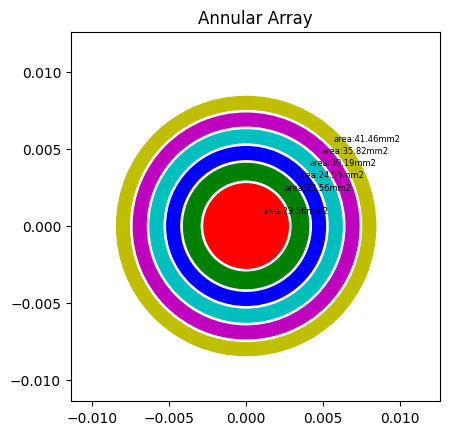

Ri(mm)    Ro(mm)
0  0.000000  2.738613
1  3.001113  4.062841
2  4.325341  5.150156
3  5.412656  6.237470
4  6.499970  7.324785
5  7.587285  8.412099

In [281]:
R_max = 9e-3
m = 6
n = 0.7
NFmax = 20e-3
F = 20e-3
r = F
Ri_list, Ro_list = calculate_annular_radii(R_max,m,n,NFmax)
# 调用函数绘制圆环阵列
plot_annular_array(Ri_list, Ro_list, colors)

R_list = np.column_stack((Ri_list,Ro_list))
# 将R_list转换为pandas DataFrame
R_df = pd.DataFrame(R_list*1e3, columns=['Ri(mm)', 'Ro(mm)'])

# 打印DataFrame
R_df


In [282]:
# 定义声压公式，考虑分母为 0 的情况
def annular_array_pressure(a1_list,a2_list, F, r, m, theta, phi, t):
    p_total = 0
    p_axis_total = 0
    epsilon = 1e-20  # 一个极小值，用于避免分母为 0
    Rm_max = 2/3*(a2_list[m-1]**3 - a2_list[m-2]**3)/(a2_list[m-1]**2-a2_list[m-2]**2)
    for i in range(m):
        a1 = a1_list[i]
        a2 = a2_list[i]
        R_m = 2/3*(a2**3 - a1**3)/(a2**2-a1**2)
        
        t_m = (np.sqrt(Rm_max ** 2 + F ** 2) - F - (np.sqrt(R_m ** 2 + F ** 2) - F)) / c
        denominator1 = k * a2 * np.cos(phi) * np.sin(theta)
        denominator2 = k * a1 * np.cos(phi) * np.sin(theta)

        # 计算 term1
        if np.abs(denominator1) < epsilon:
            # 当分母接近 0 时，使用贝塞尔函数极限性质
            term1 = a2 / 2
        else:
            term1 = (a2 ** 2 * j1(k * a2 * np.cos(phi) * np.sin(theta))) / denominator1

        # 计算 term2
        if np.abs(denominator2) < epsilon:
            # 当分母接近 0 时，使用贝塞尔函数极限性质
            term2 = a1 / 2
        else:
            term2 = (a1 ** 2 * j1(k * a1 * np.cos(phi) * np.sin(theta))) / denominator2

        p = (1j * k * rho0 * c * u / r) * (term1 - term2) * np.exp(1j * (2 * np.pi * f * t_m - k * r))
        p_total += p      

        t1 = np.sqrt(a1 ** 2 + r ** 2) 
        t2 = np.sqrt(a2 ** 2 + r ** 2)
        
        p_axis = (rho0 * c* u) * np.exp(1j * w * t)* np.exp(-1j * k * t_m * c)* (np.exp(-1j * k * t1) - np.exp(-1j * k * t2) )
        p_axis_total += p_axis
                        
    return p_total,p_axis_total

In [283]:
# 定义评价声压旁瓣和主瓣的平均函数
def evaluate_sidelobe_mainlobe(pressure_values):
    # 找到最大声压值及其索引
    num = len(pressure_values)
    max_pressure = max(pressure_values)
    max_index = pressure_values.index(max_pressure)
    # print("Mid num:",num/2, "max index:",max_index)

    if max_index < num / 2:
        max_index = int(num / 2)

    # 简单假设主瓣是最大声压值左右各 5 个点的范围，可根据实际情况调整
    mainlobe_start = max(0, max_index - 5)
    mainlobe_end = min(len(pressure_values), max_index + 5)

    # 计算主瓣的平均声压
    mainlobe_pressures = pressure_values[mainlobe_start:mainlobe_end]
    mainlobe_avg = np.mean(mainlobe_pressures)

    # 找出所有峰值点
    peaks = []
    for i in range(1, len(pressure_values) - 1):
        if pressure_values[i] > pressure_values[i - 1] and pressure_values[i] > pressure_values[i + 1]:
            peaks.append(pressure_values[i])

    # 排除主瓣范围内的峰值
    sidelobe_peaks = []
    for peak in peaks:
        peak_index = pressure_values.index(peak)
        if peak_index < mainlobe_start or peak_index >= mainlobe_end:
            sidelobe_peaks.append(peak)

    # 计算旁瓣平均声压
    sidelobe_avg = np.mean(sidelobe_peaks) if sidelobe_peaks else 0


    return mainlobe_avg, sidelobe_avg

F : 0.02, r : 0.02, m : 6, R_max : 0.009, delta_d : 0.0002625


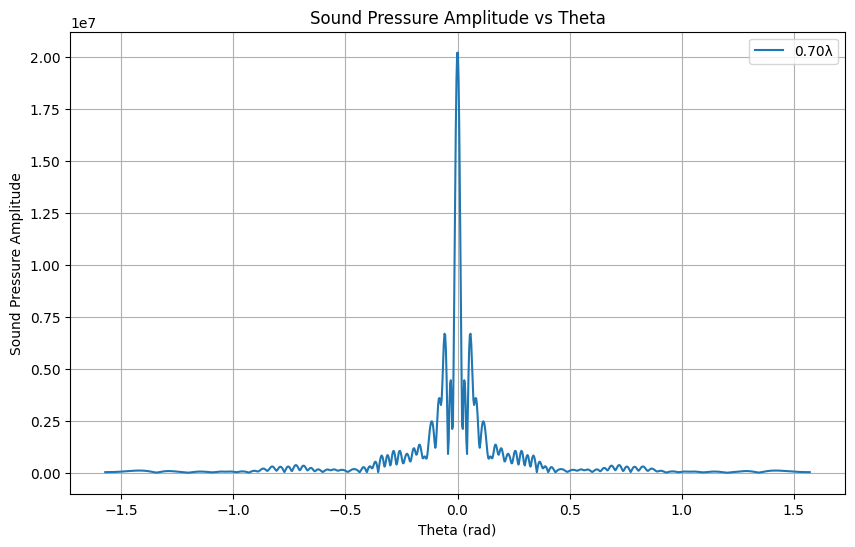

主瓣平均声压: 15565480.430862
旁瓣平均声压: 872339.164845


In [284]:
plt.figure(figsize=(10, 6))   

print(f"F : {F}, r : {r}, m : {m}, R_max : {R_max}, delta_d : {delta_d}")

# 计算每个 theta 对应的声压幅值
pressure_values = []
for theta in theta_values:
    pressure,_ = annular_array_pressure(Ri_list,Ro_list, F, r, m, theta, phi, t)
    pressure_amplitude = np.abs(pressure)
    pressure_values.append(pressure_amplitude)
    # 绘制声压随 theta 的变化曲线    
plt.plot(theta_values, pressure_values,label='%.2fλ'%n)
plt.xlabel('Theta (rad)')
plt.ylabel('Sound Pressure Amplitude')
plt.title('Sound Pressure Amplitude vs Theta')
plt.legend()
plt.grid(True)
plt.show()    

# 调用评价函数
mainlobe_avg, sidelobe_avg = evaluate_sidelobe_mainlobe(pressure_values)
print(f"主瓣平均声压: {mainlobe_avg:.6f}")
print(f"旁瓣平均声压: {sidelobe_avg:.6f}")

In [285]:
def find_all_peaks(pressure_values):
    """
    寻找压力值列表中的所有峰值。

    参数:
    pressure_values (list): 包含压力值的列表。

    返回:
    list: 包含所有峰值的列表。
    """
    peaks, _ = find_peaks(pressure_values)
    return [pressure_values[i] for i in peaks]

In [286]:
def Sound_Pressure_delta(m, F, r, R_max, n, theta, phi, t):
    # 定义 theta 范围
    theta_values = np.linspace(-np.pi/2 , np.pi /2, 1000)

    # 定义 delta_d 数组，范围从 0.1 * lambda_ 到 2 * lambda_
    delta_d_array = np.linspace(0.7 * lambda_, 1 * lambda_, 4)
    
    Rin_list = np.zeros(m)
    Rout_list = np.zeros(m)
    mainlobe_avg_list = []
    sidelobe_avg_list = []

    # 开始绘制不同 delta_d 下的声压曲线
    plt.figure(figsize=(20, 6))
    # 设置图片清晰度
    plt.rcParams['figure.dpi'] = 100

    for del_d in delta_d_array:
        # 调用函数计算圆环内外径
        Rin_list, Rout_list = calculate_annular_radii(R_max, m, n,NFmax)
        # 调用函数绘制圆环阵列
        # plot_annular_array(Rin_list, Rout_list, R_max, delta_d, colors)
        # 计算每个 theta 对应的声压幅值
        pressure_values = []
        for the_ta in theta_values:
            pressure,_ = annular_array_pressure(Rin_list,Rout_list,F, r, m, the_ta, phi, t)
            pressure_amplitude = np.abs(pressure)
            pressure_values.append(pressure_amplitude)
        # 将 theta 从弧度转换为角度
        theta_values_deg = np.rad2deg(theta_values)
        # 绘制声压随 theta（角度）的变化曲线
        plt.plot(theta_values_deg, pressure_values, label='{:.2f}λ'.format(del_d/lambda_))
        
        # 找出所有峰值
        peak_values = find_all_peaks(pressure_values)
        
        if len(peak_values) >= 2:
            # 对峰值进行排序
            sorted_peak_indices = np.argsort(peak_values)
            second_max_peak_index = sorted_peak_indices[-2]
            second_max_peak_original_index = np.where(np.array(pressure_values) == peak_values[second_max_peak_index])[0][0]
            
            # 找出最大值
            max_index = np.argmax(pressure_values)
            
            # 打印信息
            print(f"最大值索引: {theta_values_deg[max_index]}", f"最大值: {pressure_values[max_index]:.2e}")
            print(f"第二大峰值索引: {theta_values_deg[second_max_peak_original_index]}", f"第二大峰值: {pressure_values[second_max_peak_original_index]:.2e}")
            
            # 标记最大值和第二大峰值
            plt.text(theta_values_deg[max_index], pressure_values[max_index], f'Max: {theta_values_deg[max_index]:.2f}', ha='right', va='bottom')
            plt.text(theta_values_deg[second_max_peak_original_index], pressure_values[second_max_peak_original_index], f'Second : {theta_values_deg[second_max_peak_original_index]:.2f}', ha='right', va='bottom')
        
        # 调用评价函数
        mainlobe_avg, sidelobe_avg = evaluate_sidelobe_mainlobe(pressure_values)
        mainlobe_avg_list.append(mainlobe_avg)
        sidelobe_avg_list.append(sidelobe_avg)
        #print(f"主瓣平均声压: {mainlobe_avg:.6f}")
        #print(f"旁瓣平均声压: {sidelobe_avg:.6f}")
        
    plt.xlabel('Theta (rad)')
    plt.ylabel('Sound Pressure Amplitude')
    plt.title('Sound Pressure Amplitude vs Theta')
    plt.legend()
    plt.grid(True)
    #plt.show() 

""" 
    # 绘制主瓣平均声压柱状图
    x_pos = np.arange(len(delta_d_array))
    x_data = [f'{v:.3f}' for v in delta_d_array / lambda_]

    fig,ax1 = plt.subplots()
    fig.set_size_inches(20, 6)
    ax1.set_xticks(x_pos, x_data)

    ax1.plot(x_pos, mainlobe_avg_list,color='red')
    for i, v in enumerate(mainlobe_avg_list):
        ax1.text(x_pos[i], v, f'{v:.2e}', ha='center', va='bottom')
    ax1.set_xlabel('delta_d(λ)')
    ax1.set_ylabel('Mainlobe Average Sound Pressure')
    ax1.legend('Mainlobe')
    # plt.xlabel('delta_d')
    # plt.title('Mainlobe Average Sound Pressure')    
    # 显示图表
    # plt.show()
        
    # plt.figure(figsize=(20, 6))    
    # plt.xticks(x_pos, x_data)
    ax2 = ax1.twinx()
    ax2.plot(x_pos, sidelobe_avg_list,color='blue')
    ax2.set_ylabel('Sidelobe Average Sound Pressure')
    for i, v in enumerate(sidelobe_avg_list):
        ax2.text(x_pos[i], v, f'{v:.2e}', ha='center', va='bottom')
    ax2.legend('Sidelobe')    
    # plt.xlabel('delta_d')
    # plt.title('Sidelobe Average Sound Pressure')
    # 显示图表
    plt.show() """

" \n    # 绘制主瓣平均声压柱状图\n    x_pos = np.arange(len(delta_d_array))\n    x_data = [f'{v:.3f}' for v in delta_d_array / lambda_]\n\n    fig,ax1 = plt.subplots()\n    fig.set_size_inches(20, 6)\n    ax1.set_xticks(x_pos, x_data)\n\n    ax1.plot(x_pos, mainlobe_avg_list,color='red')\n    for i, v in enumerate(mainlobe_avg_list):\n        ax1.text(x_pos[i], v, f'{v:.2e}', ha='center', va='bottom')\n    ax1.set_xlabel('delta_d(λ)')\n    ax1.set_ylabel('Mainlobe Average Sound Pressure')\n    ax1.legend('Mainlobe')\n    # plt.xlabel('delta_d')\n    # plt.title('Mainlobe Average Sound Pressure')    \n    # 显示图表\n    # plt.show()\n        \n    # plt.figure(figsize=(20, 6))    \n    # plt.xticks(x_pos, x_data)\n    ax2 = ax1.twinx()\n    ax2.plot(x_pos, sidelobe_avg_list,color='blue')\n    ax2.set_ylabel('Sidelobe Average Sound Pressure')\n    for i, v in enumerate(sidelobe_avg_list):\n        ax2.text(x_pos[i], v, f'{v:.2e}', ha='center', va='bottom')\n    ax2.legend('Sidelobe')    \n    # plt.xl

In [287]:
def Sound_Pressure_single(m, F, r, R_max, n, theta, phi, t):
    
    Rin_list = np.zeros(m)
    Rout_list = np.zeros(m)
    
    # 调用函数计算圆环内外径
    Rin_list, Rout_list = calculate_annular_radii(R_max, m, n, NFmax)
    # 调用函数绘制圆环阵列
    # plot_annular_array(Rin_list, Rout_list, colors)
    # 计算每个 theta 对应的声压幅值
    pressure_values = []
    pressure_axis_val = []
    for the_ta in theta_values:
        pressure,_ = annular_array_pressure(Rin_list,Rout_list, F, r, m, the_ta, phi, t)
        pressure_values.append(np.abs(pressure))
        
    r_values = np.linspace(0.1*lambda_, F * 2,1000)  # 不同的距离 r        
    for ra in r_values:
        _,pre_axis = annular_array_pressure(Rin_list,Rout_list, F, ra, m, the_ta, phi, t)
        pressure_axis_val.append(np.abs(pre_axis))
                
    return pressure_values,pressure_axis_val

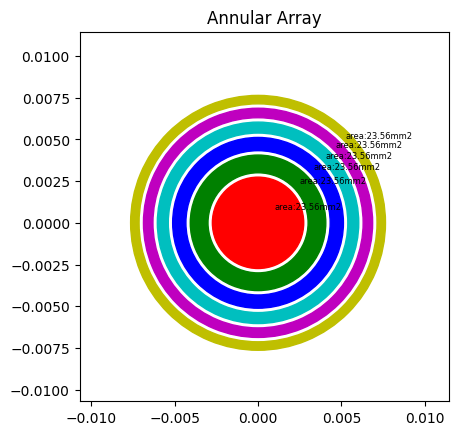

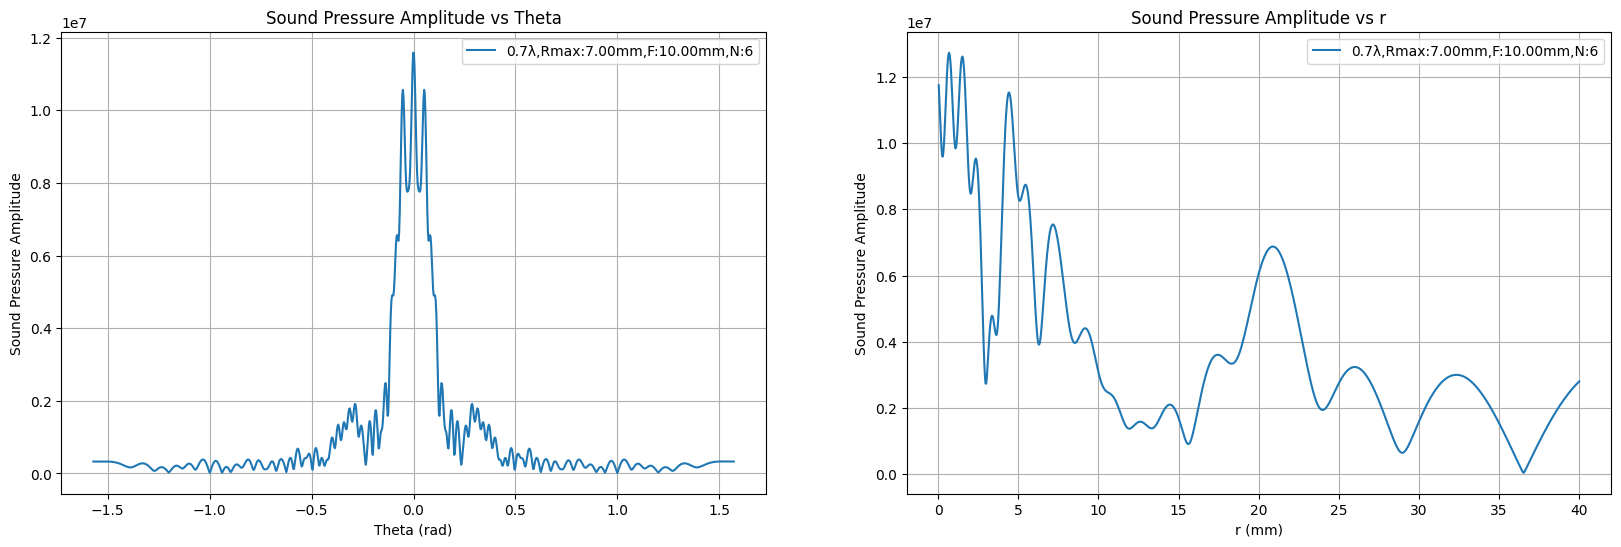

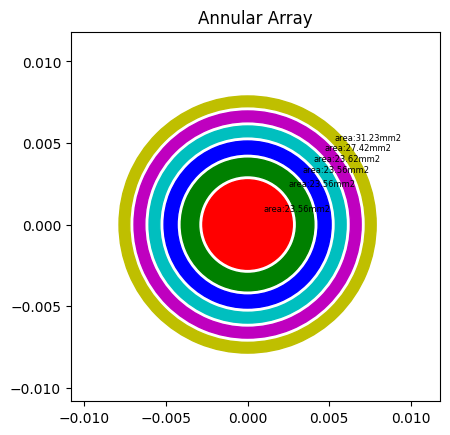

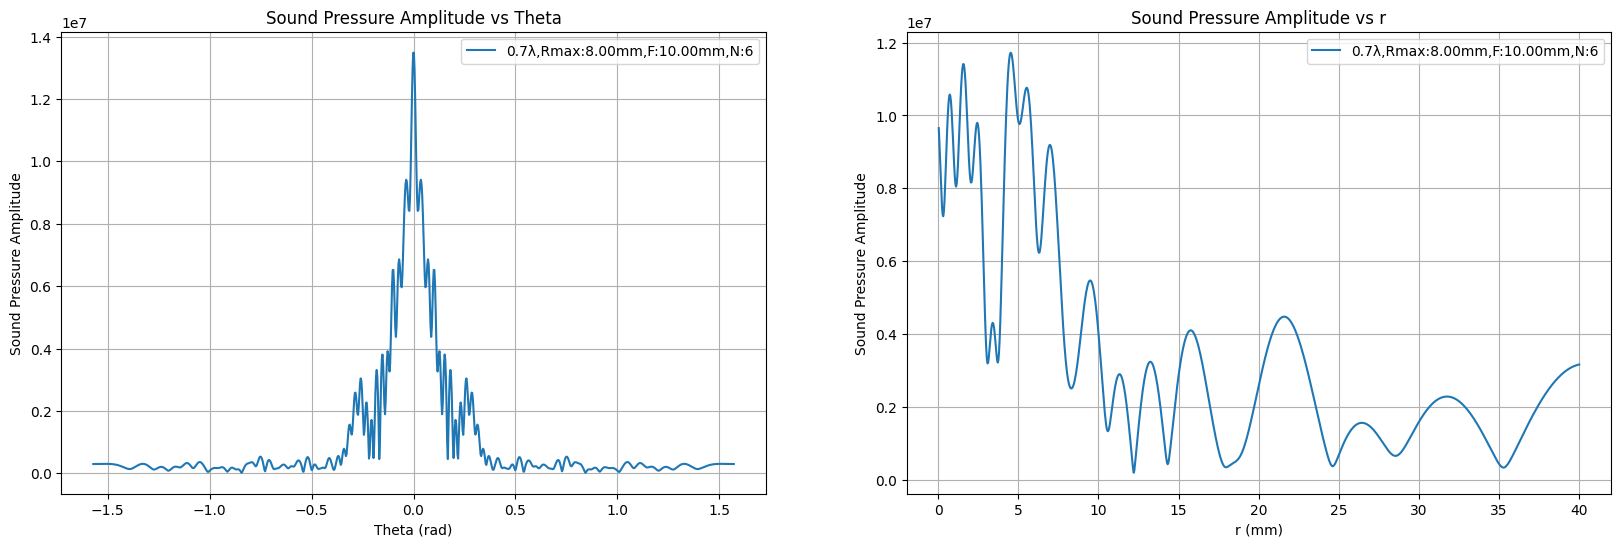

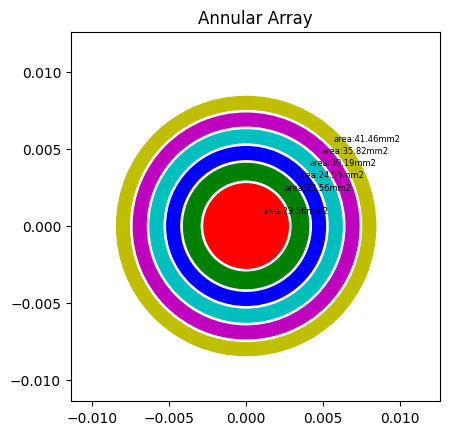

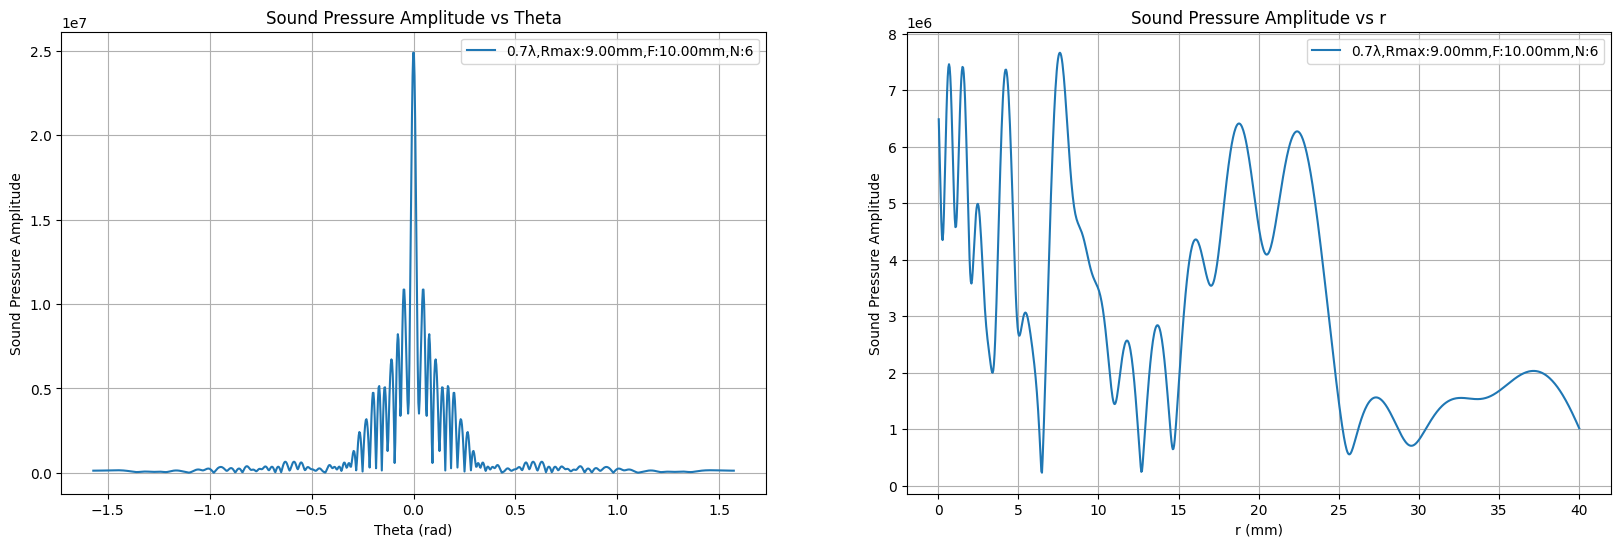

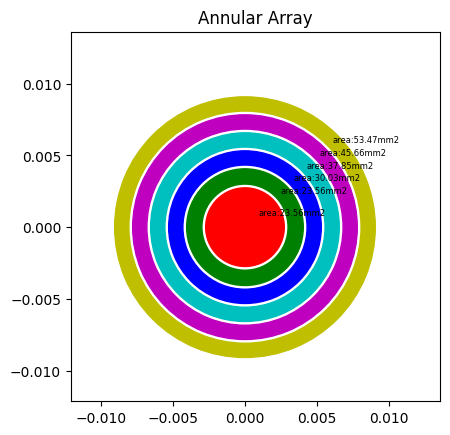

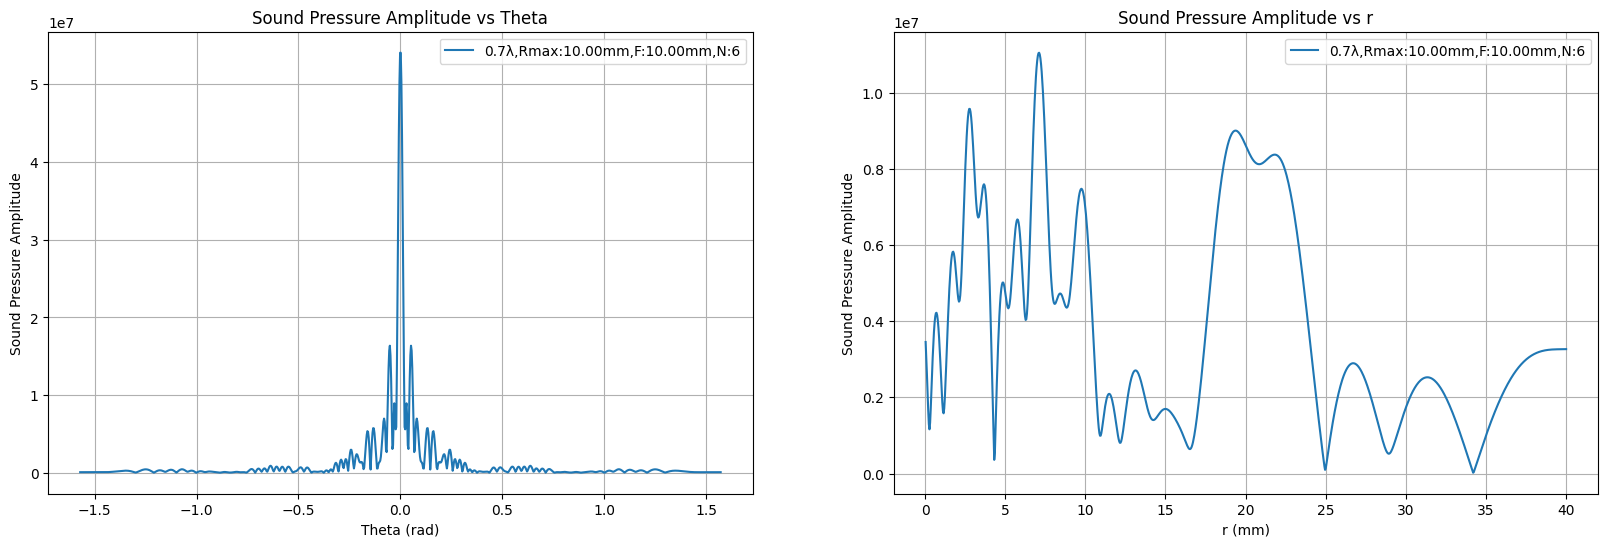

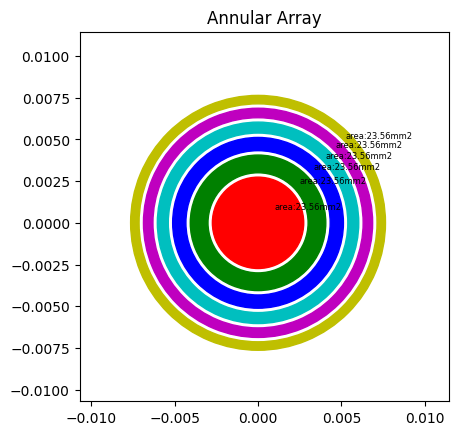

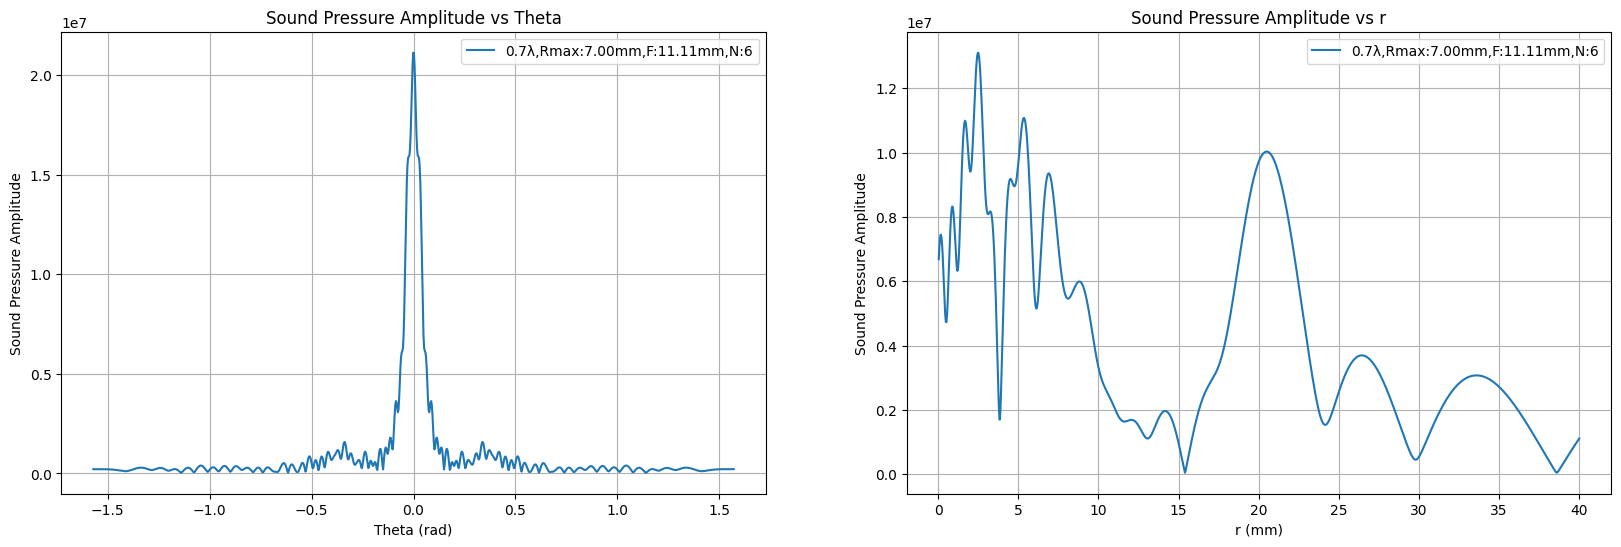

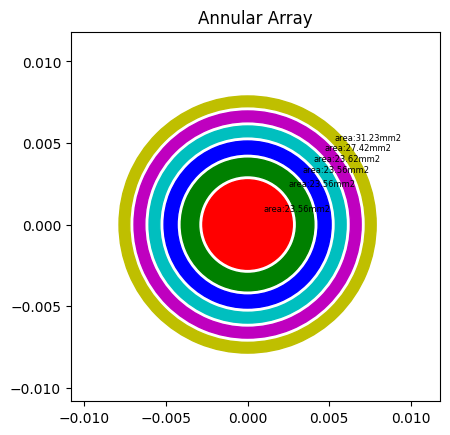

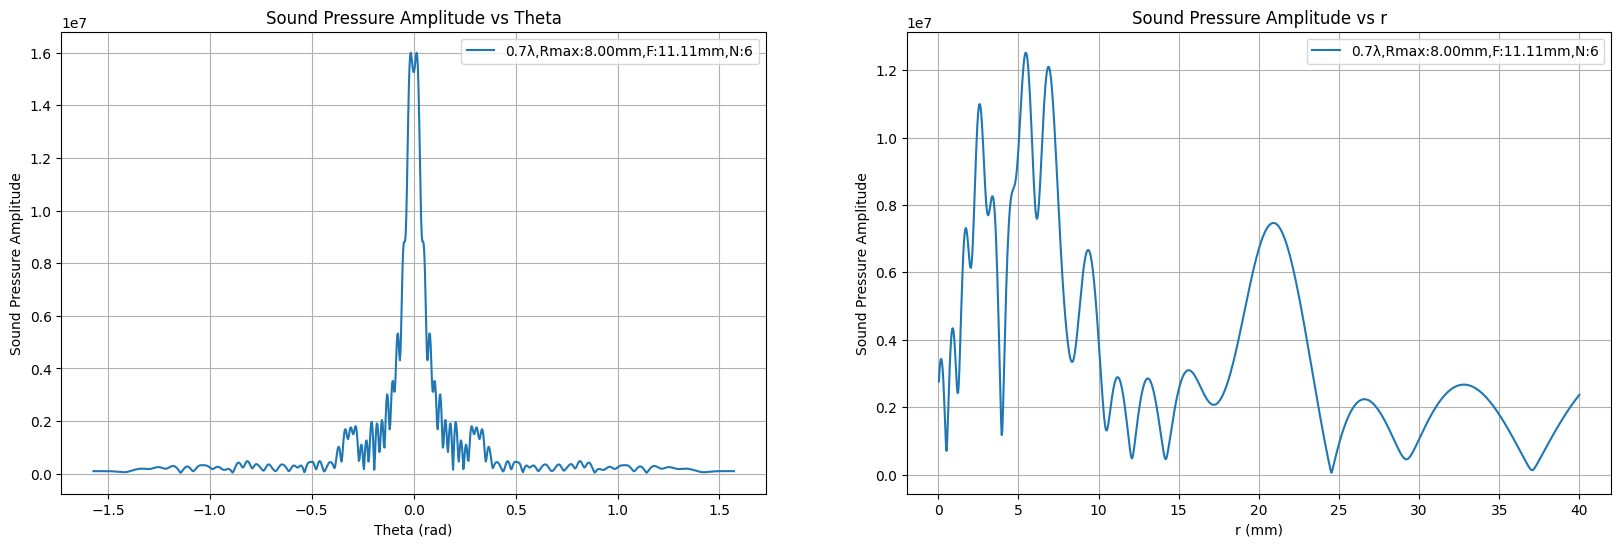

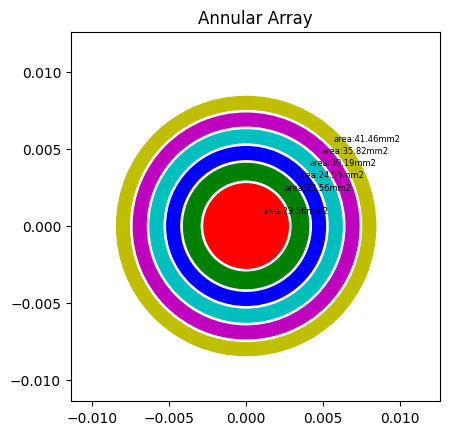

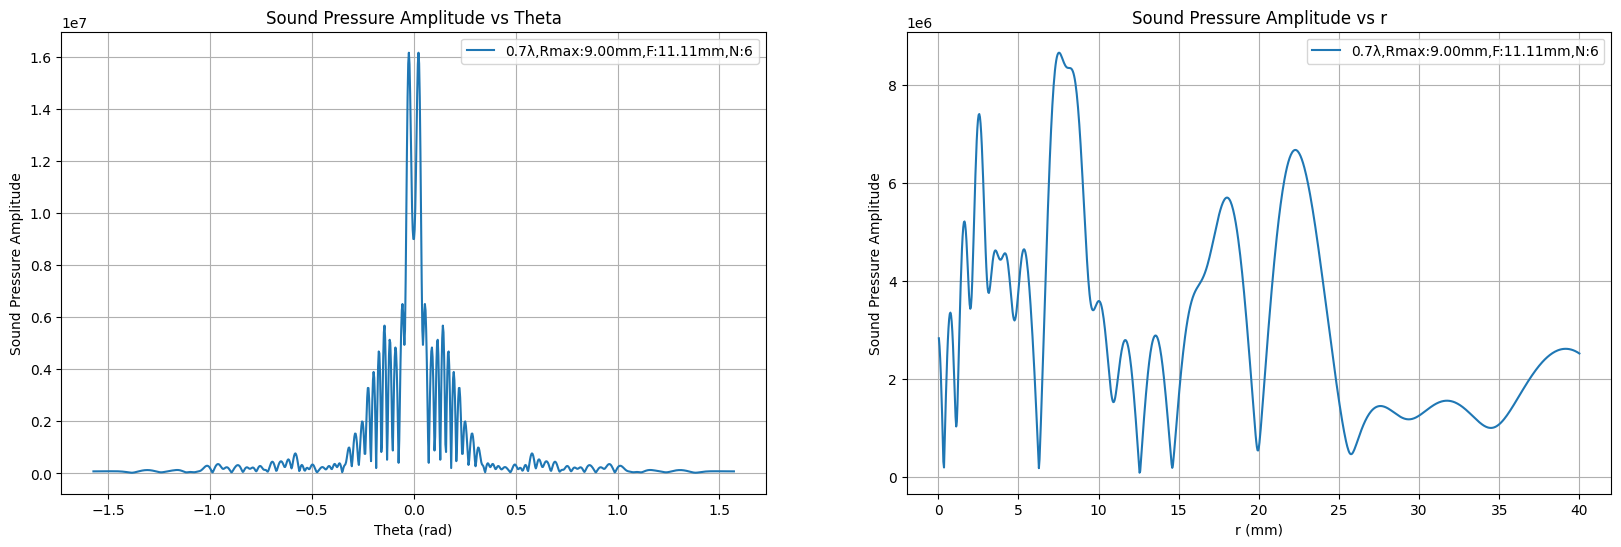

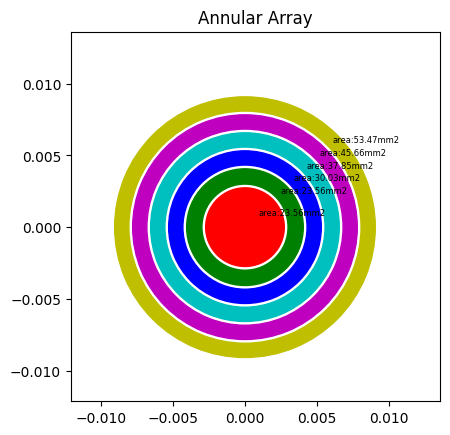

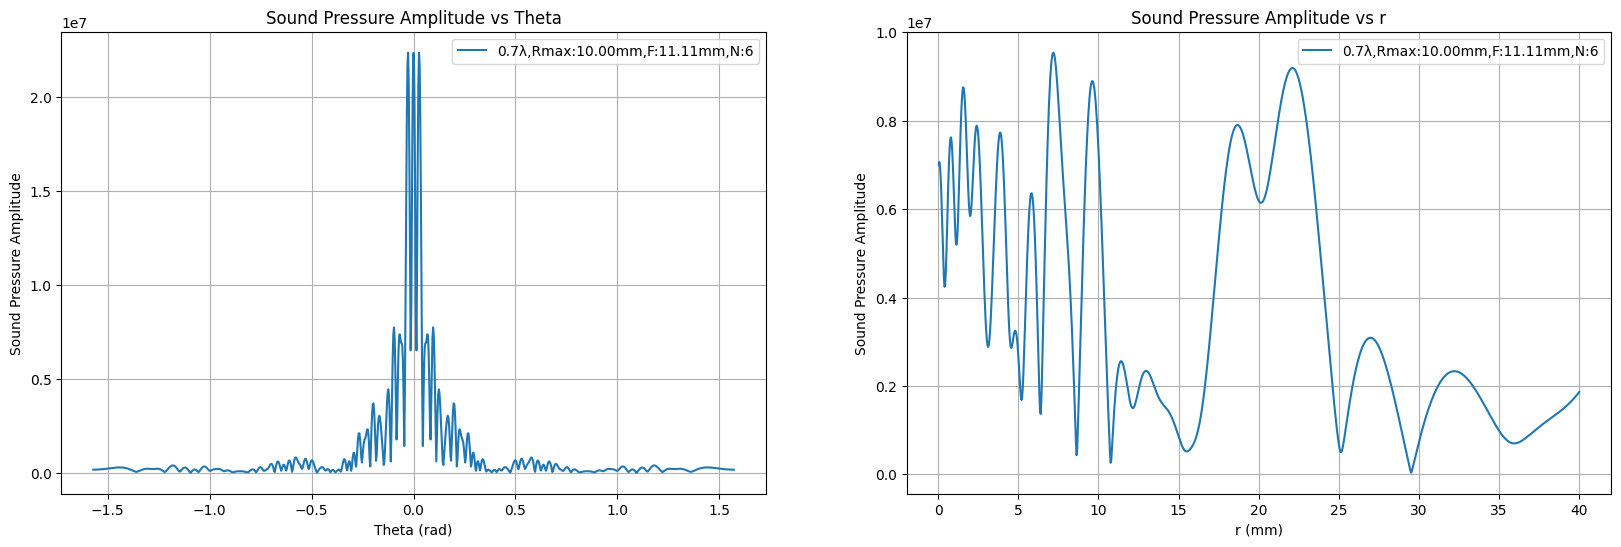

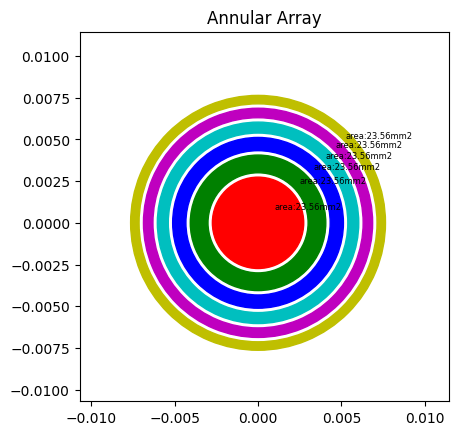

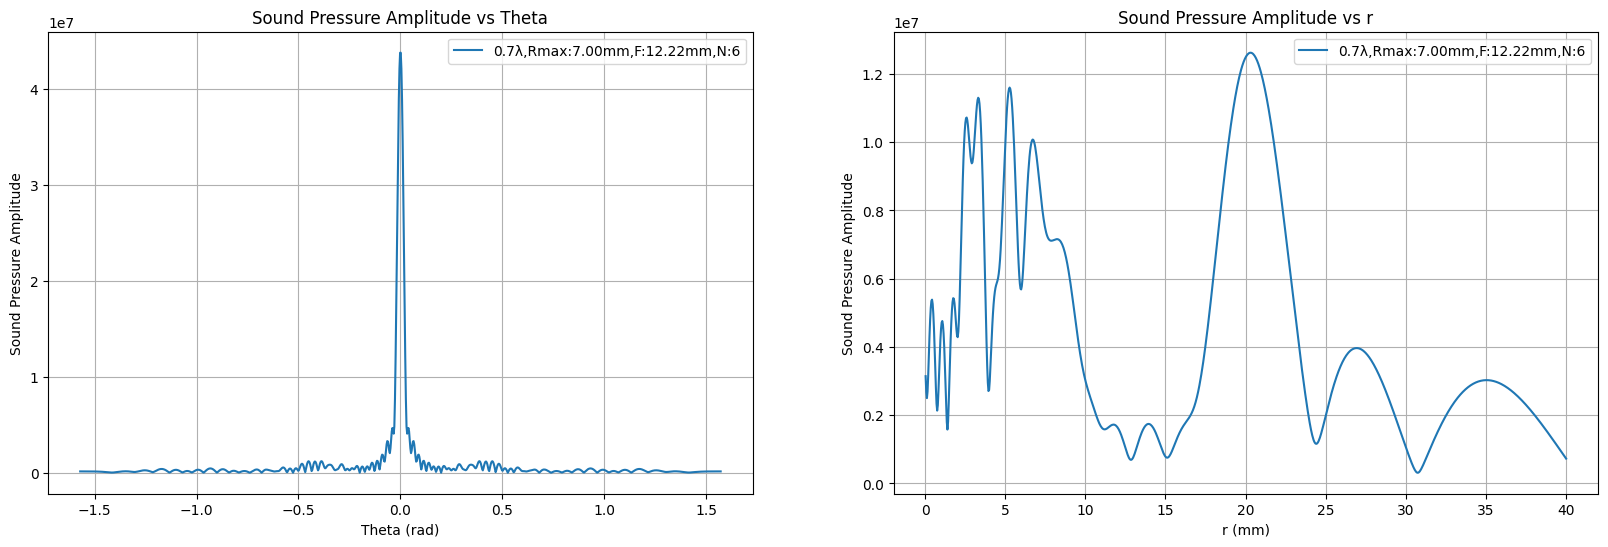

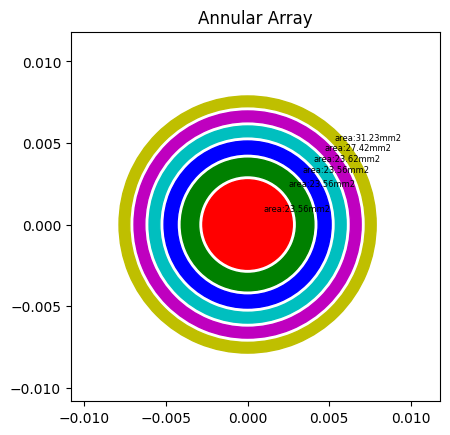

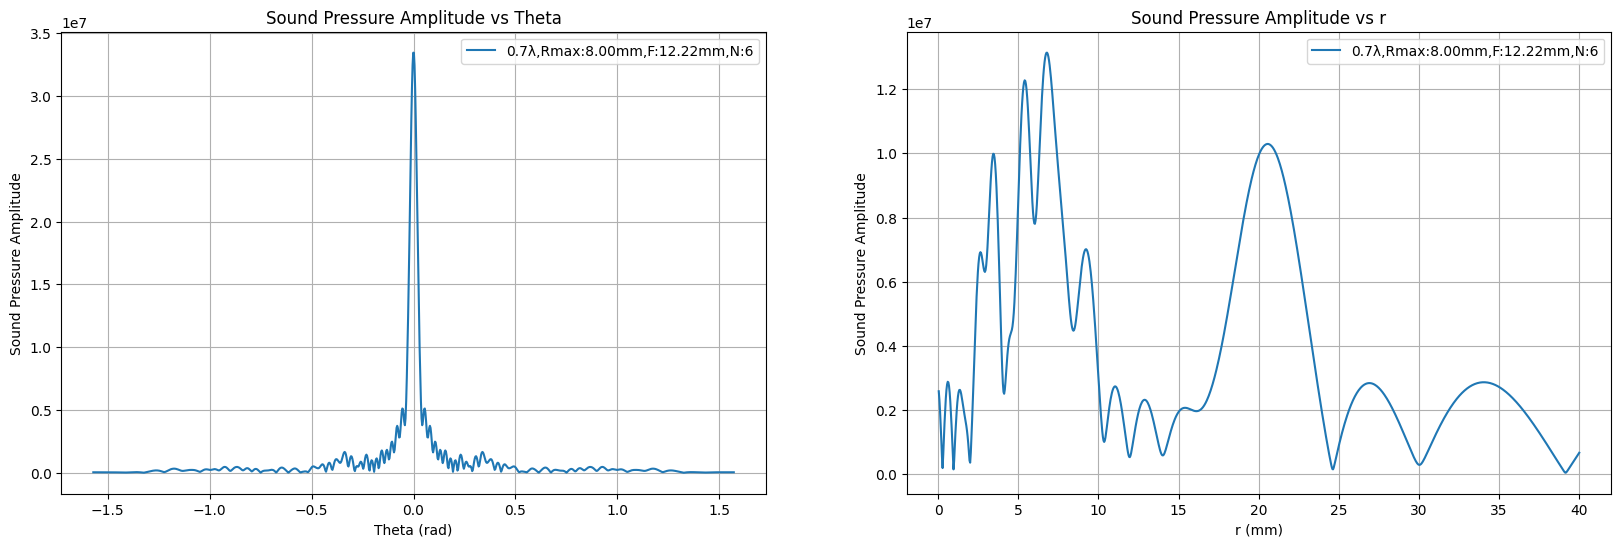

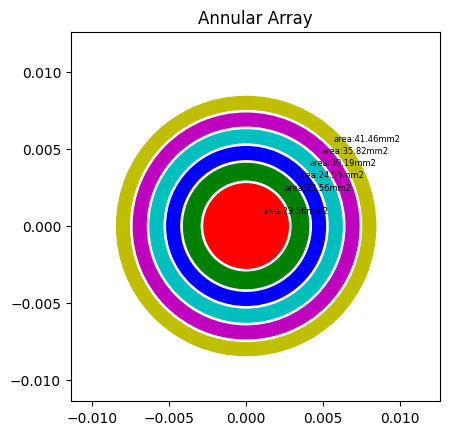

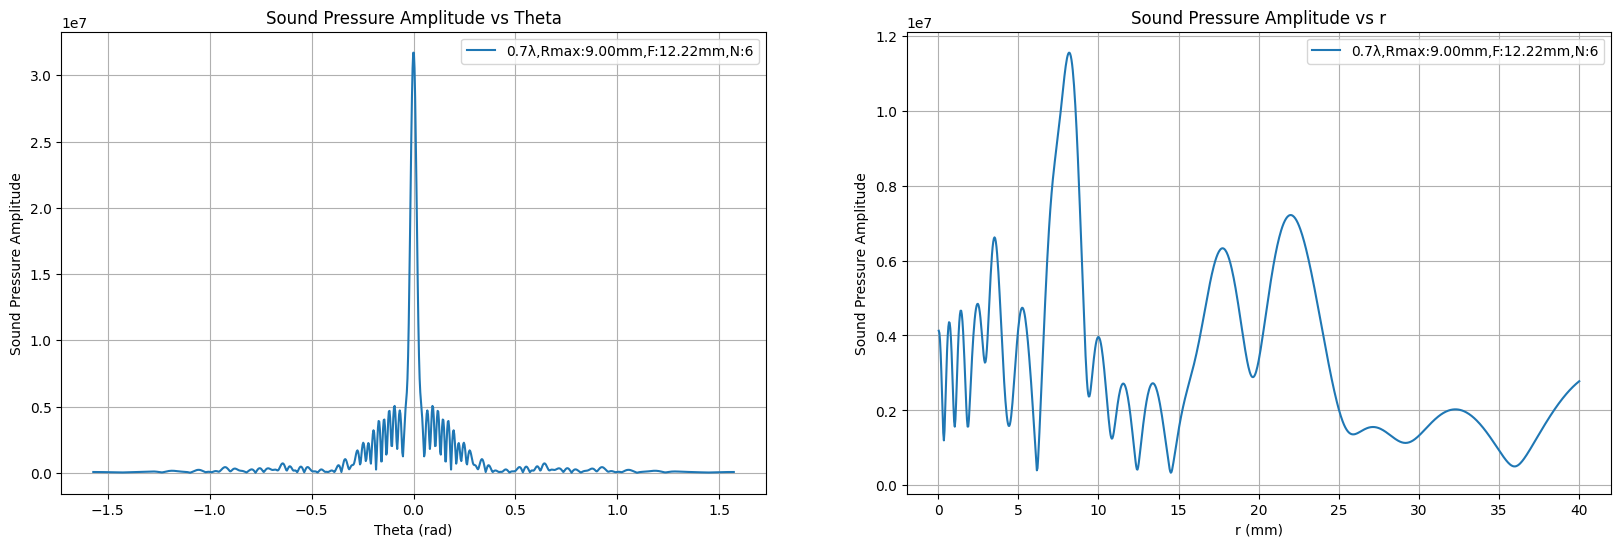

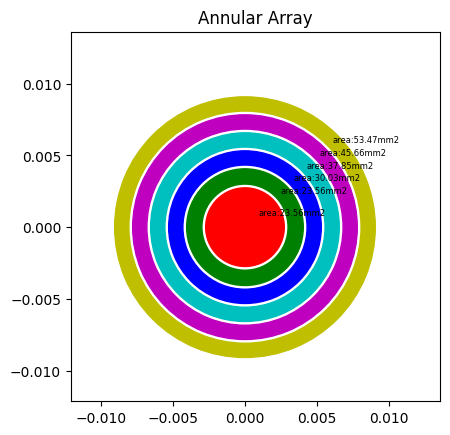

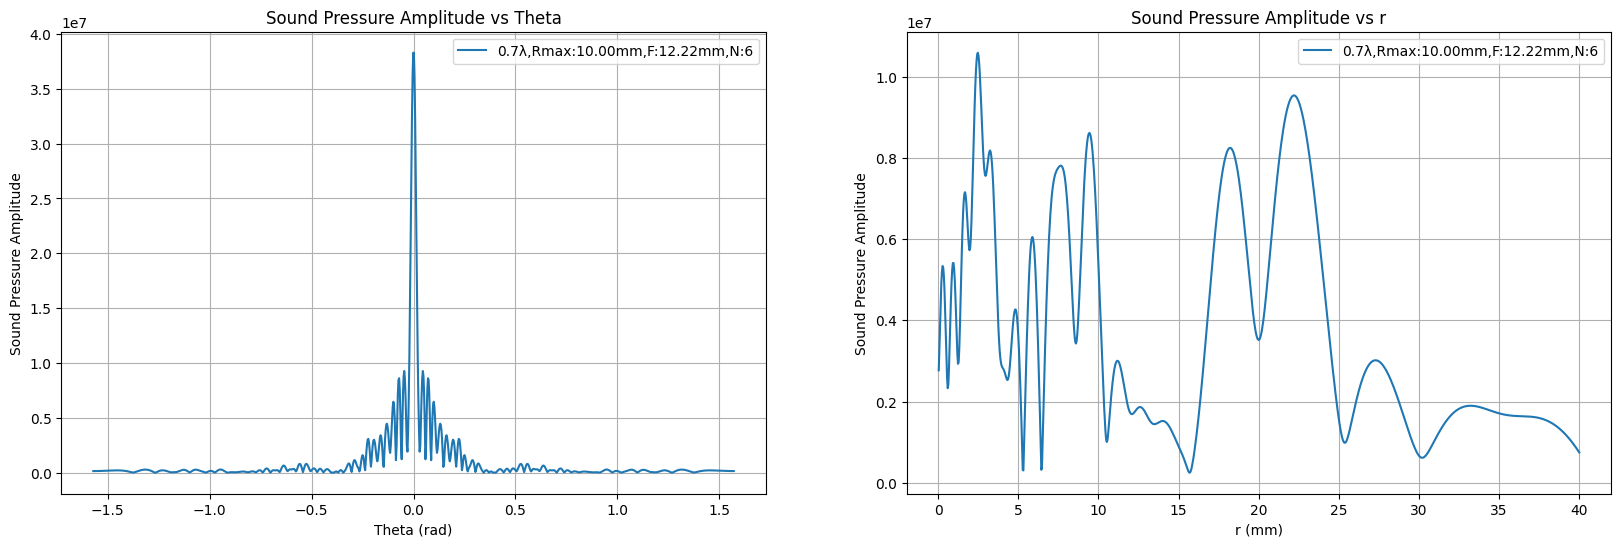

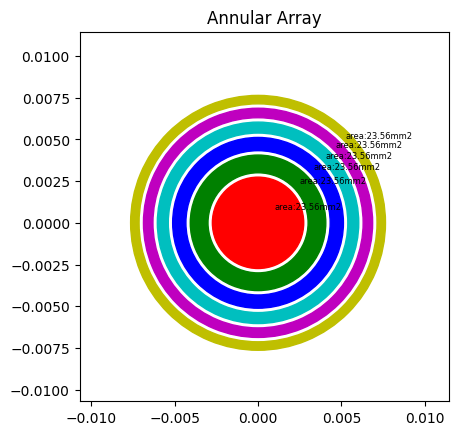

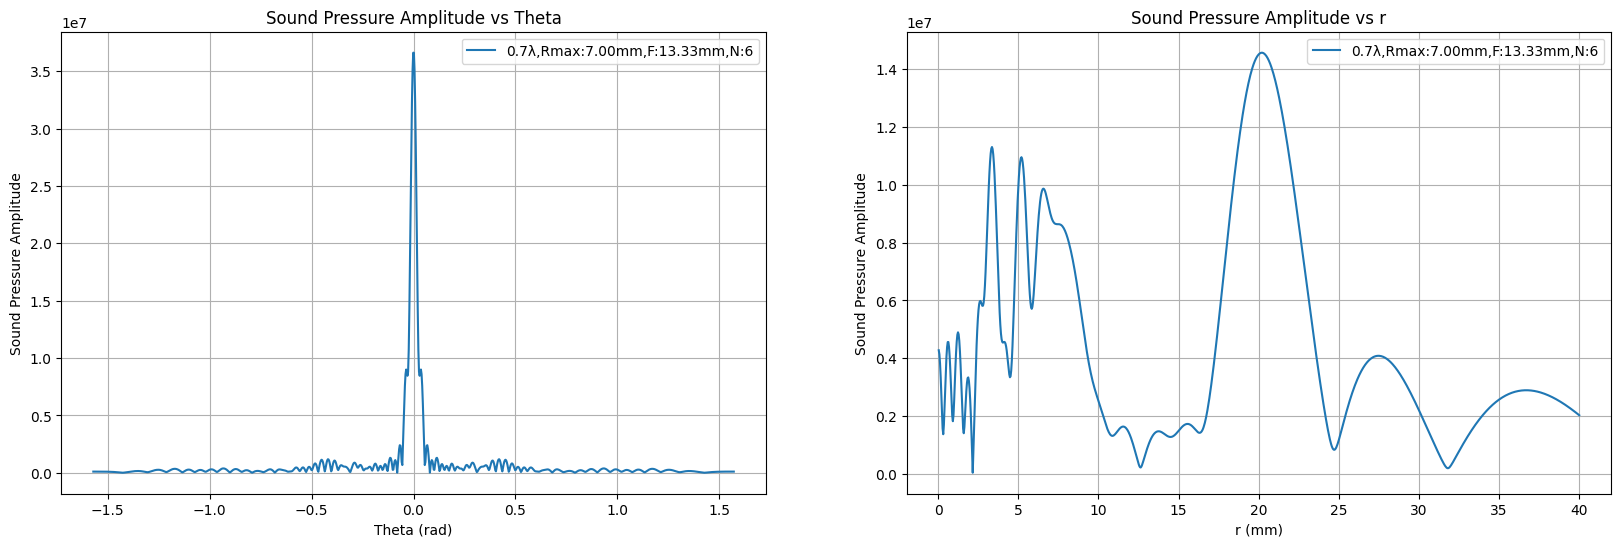

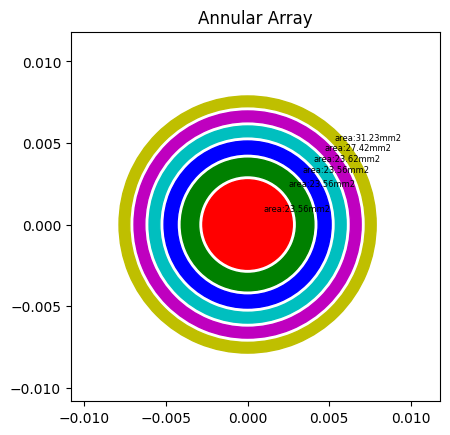

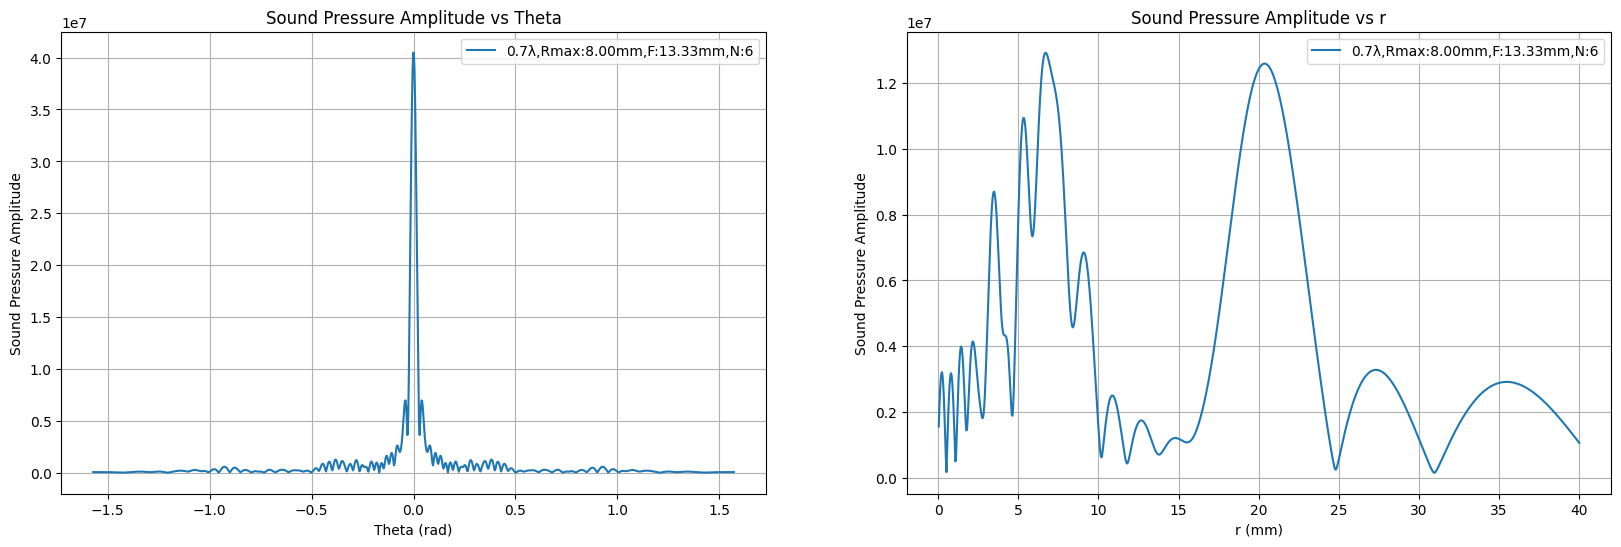

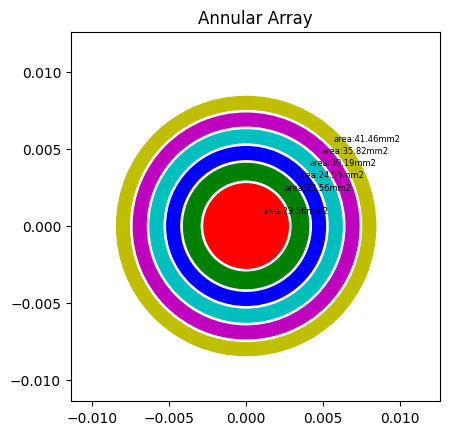

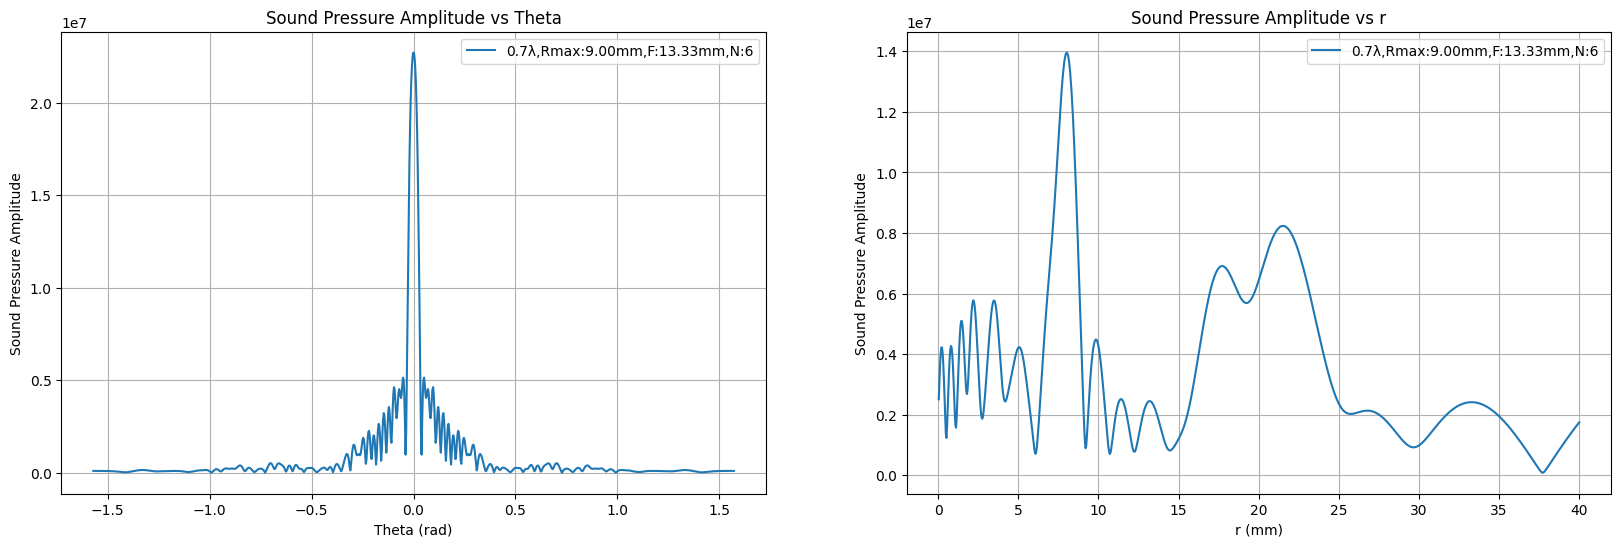

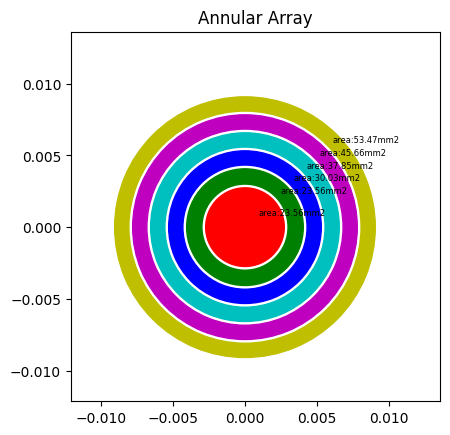

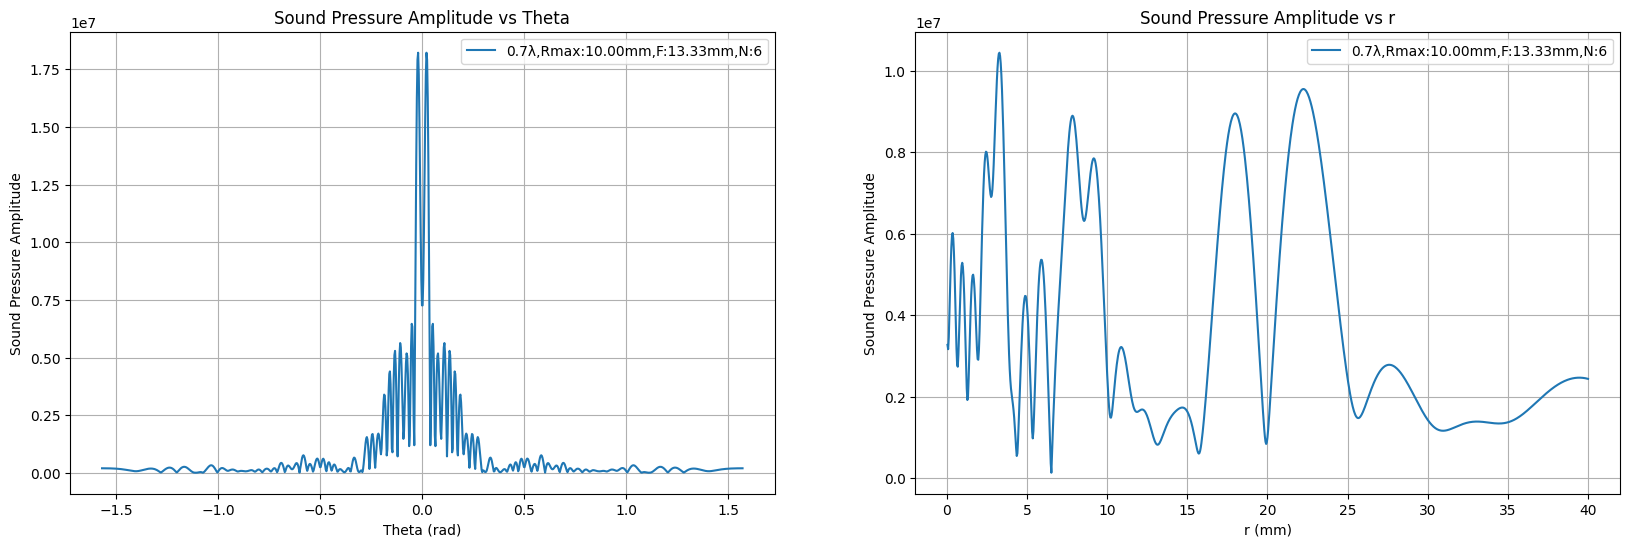

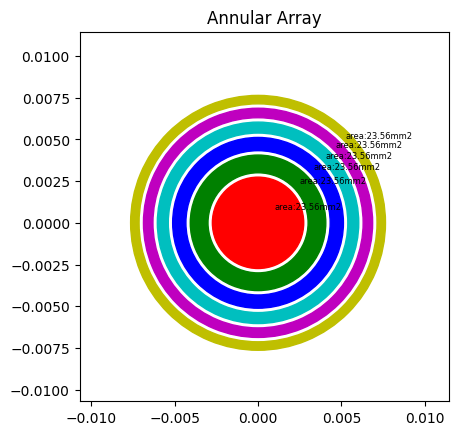

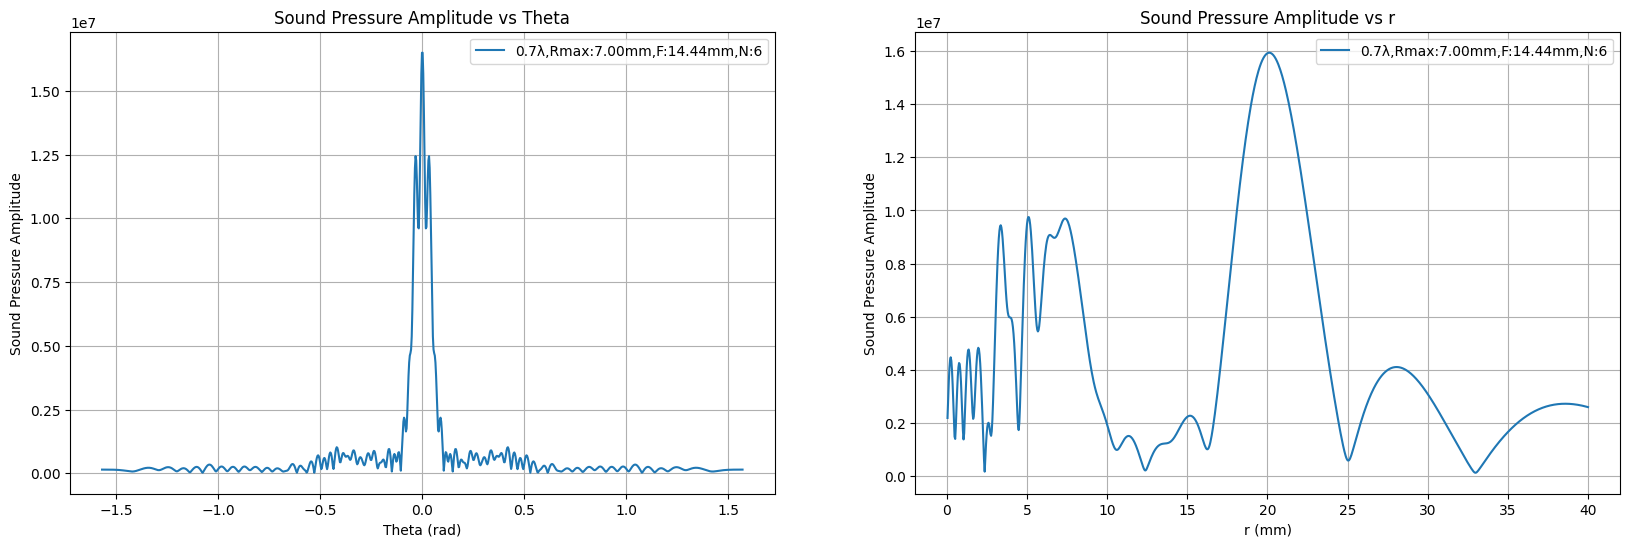

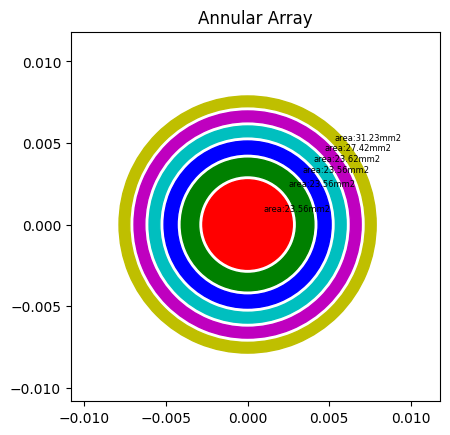

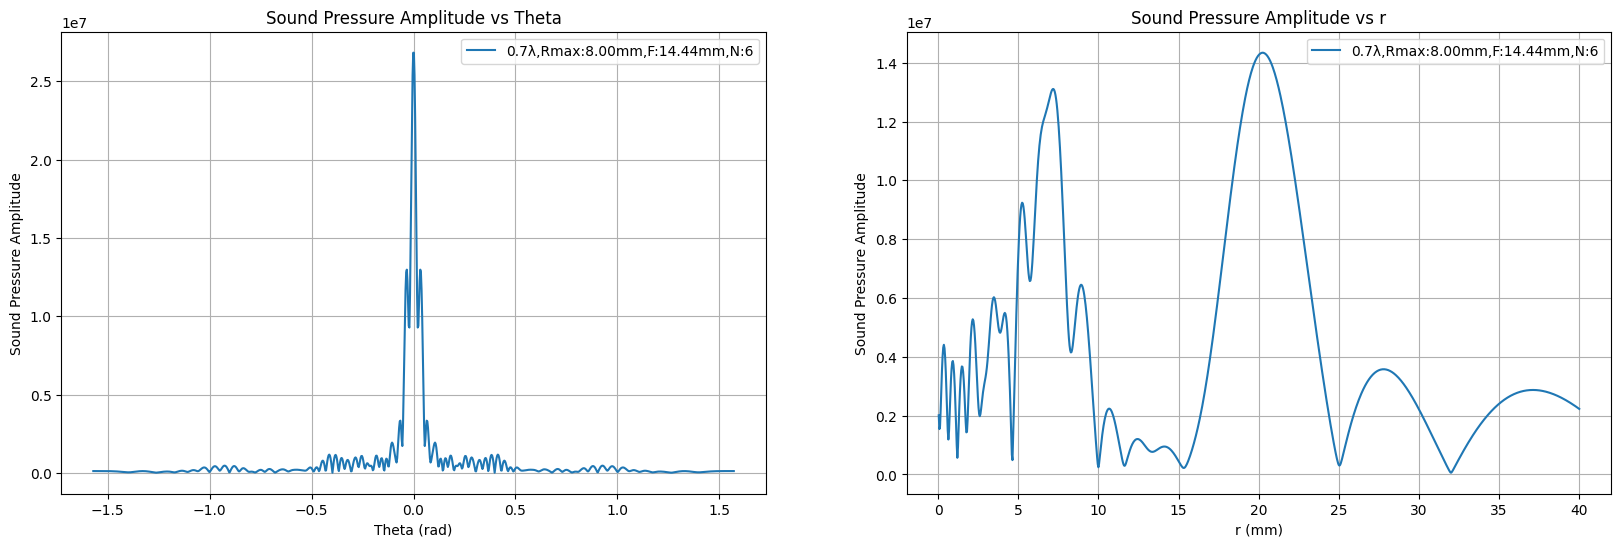

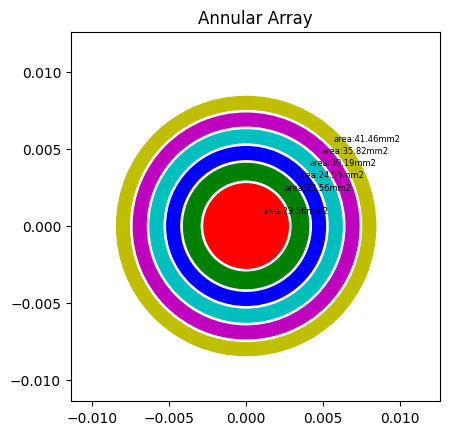

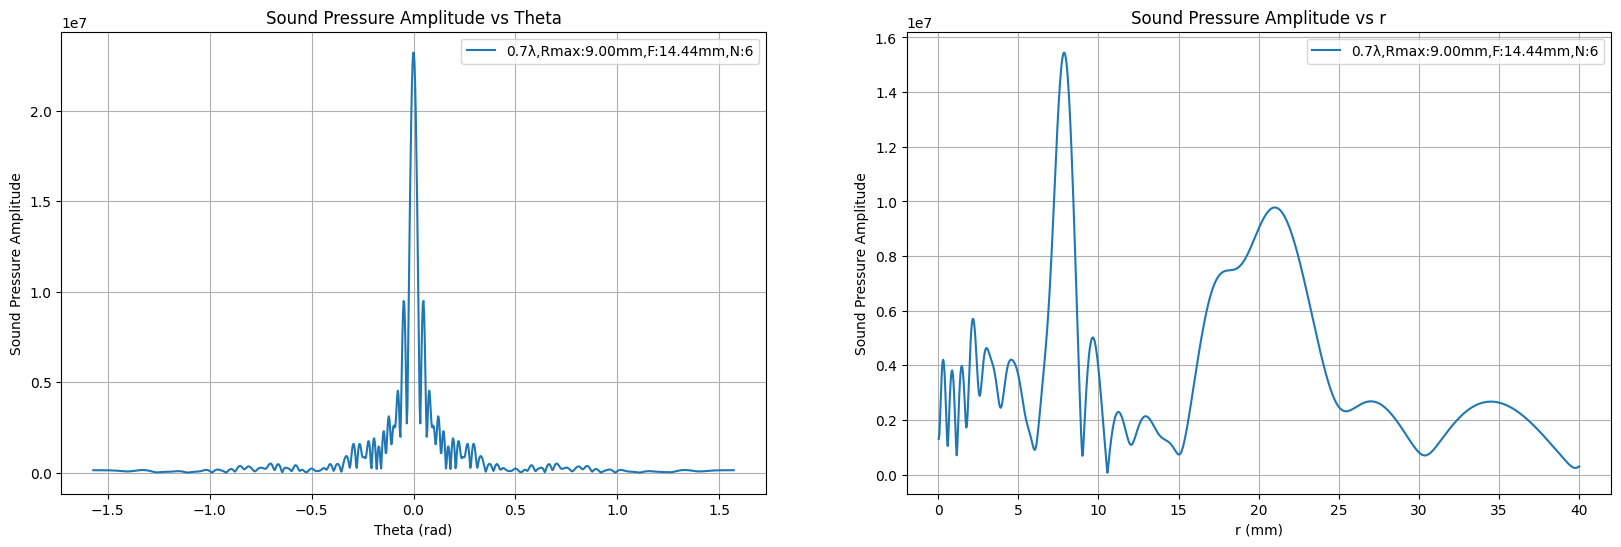

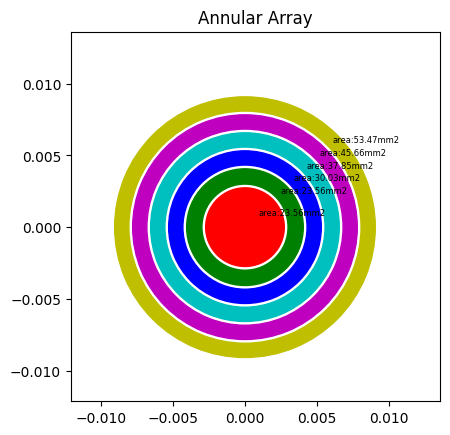

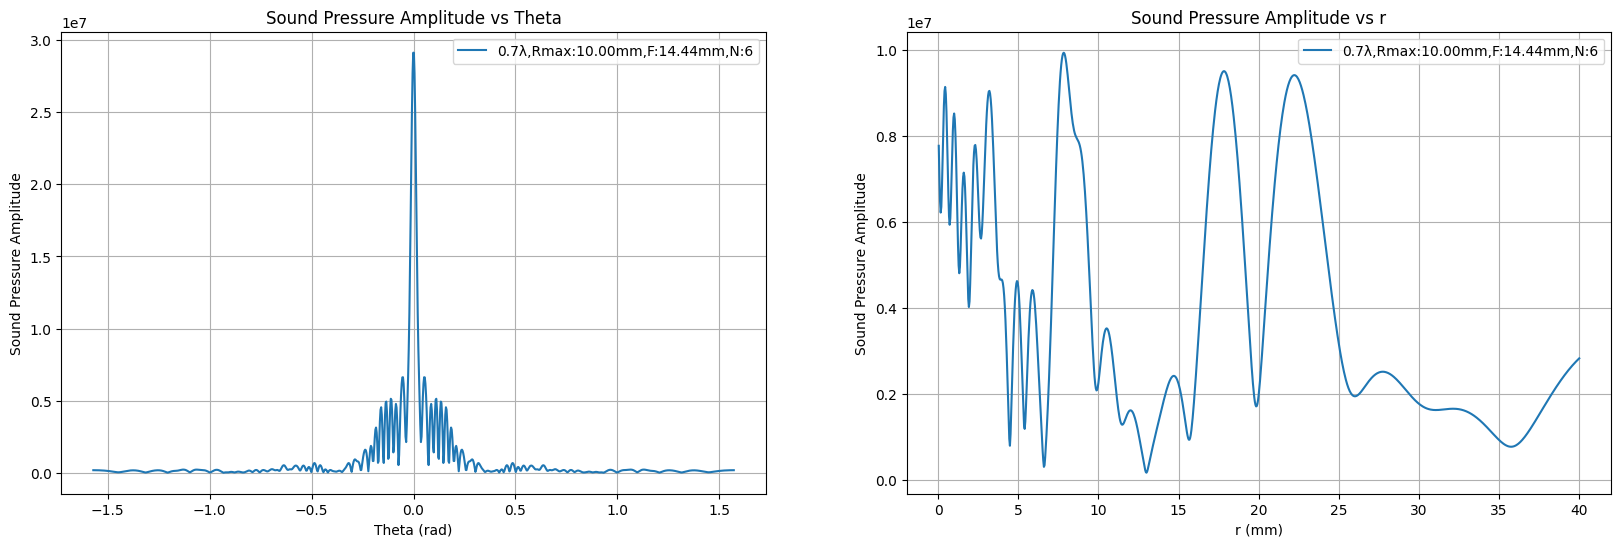

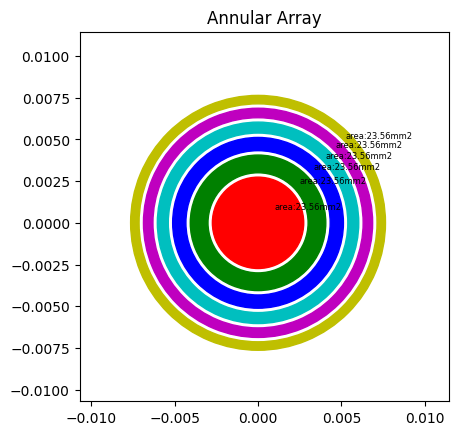

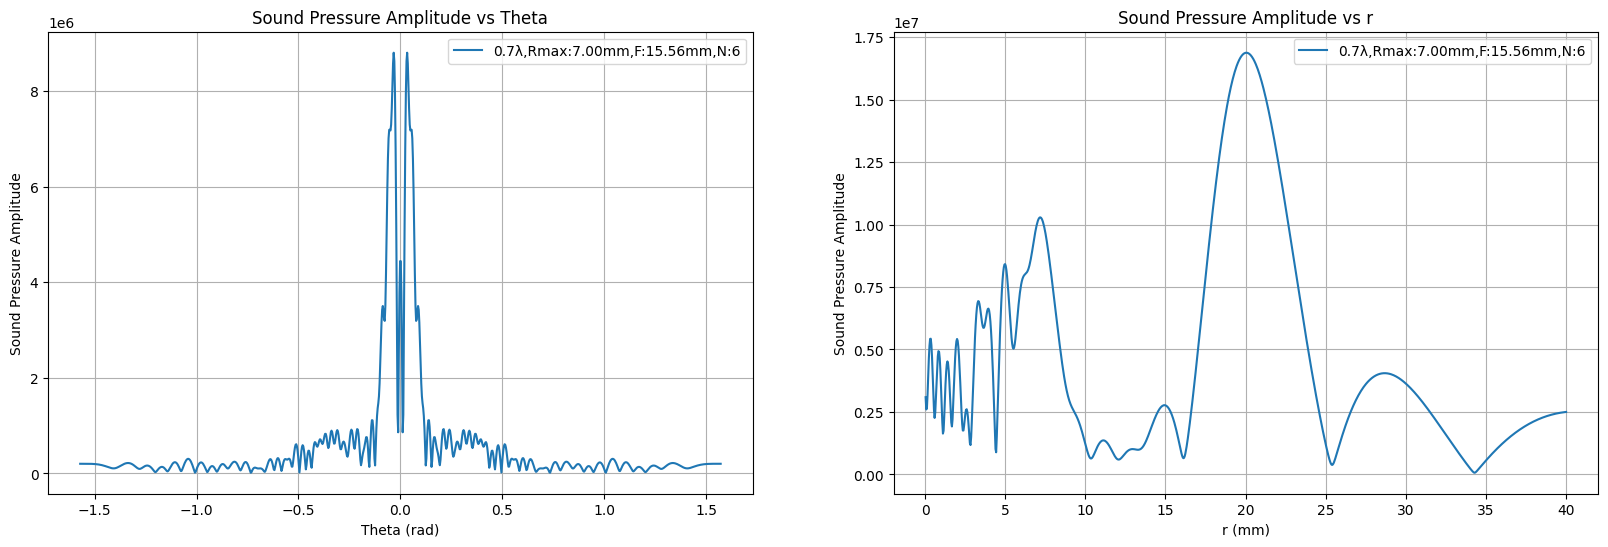

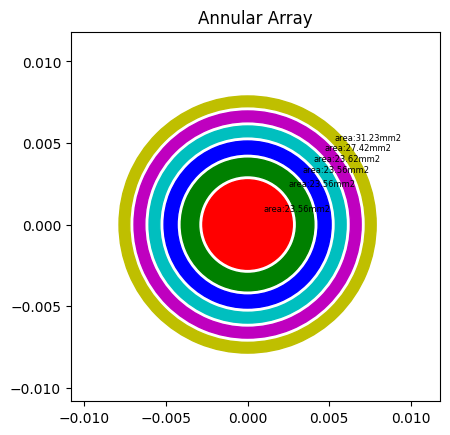

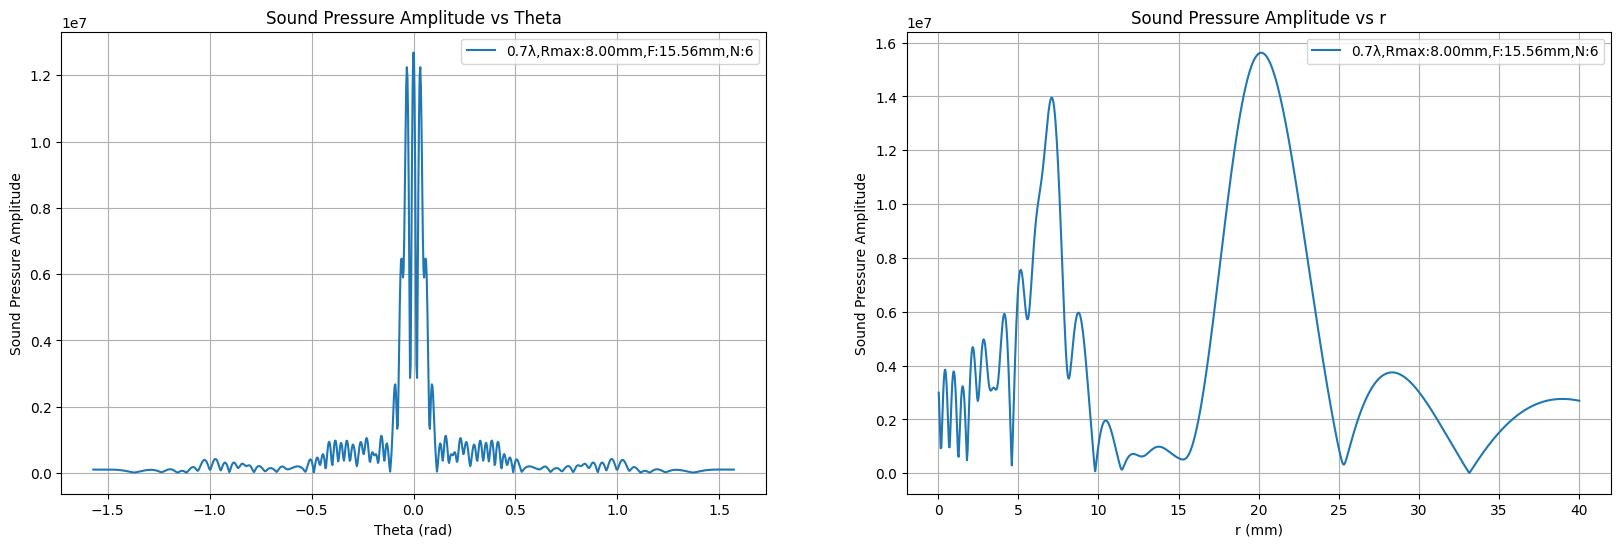

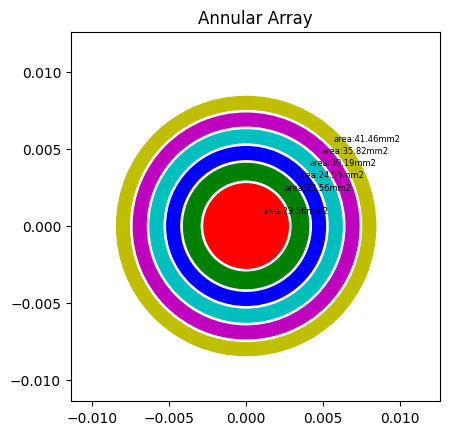

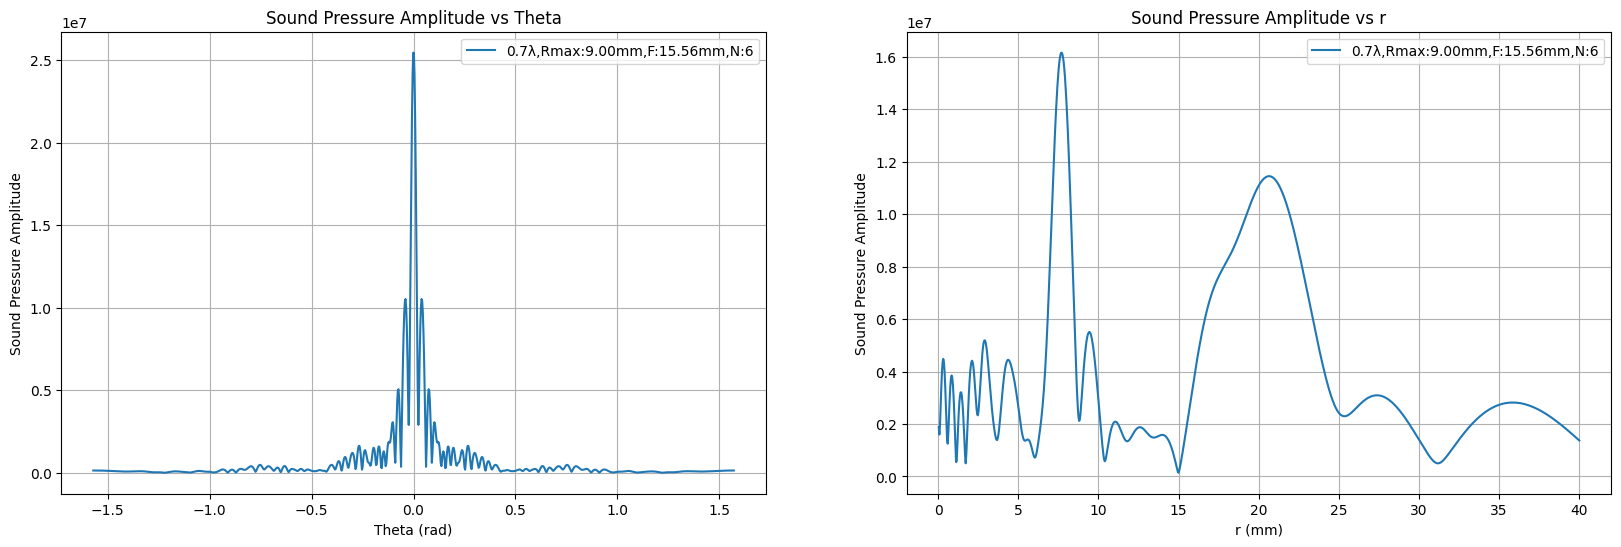

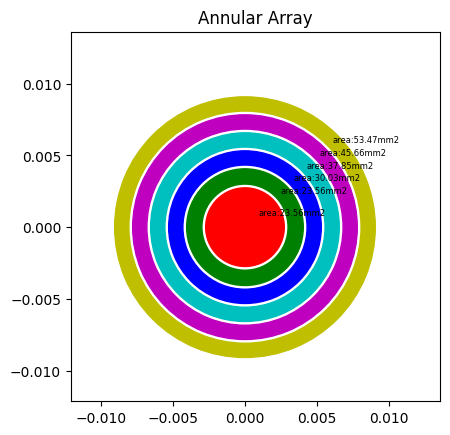

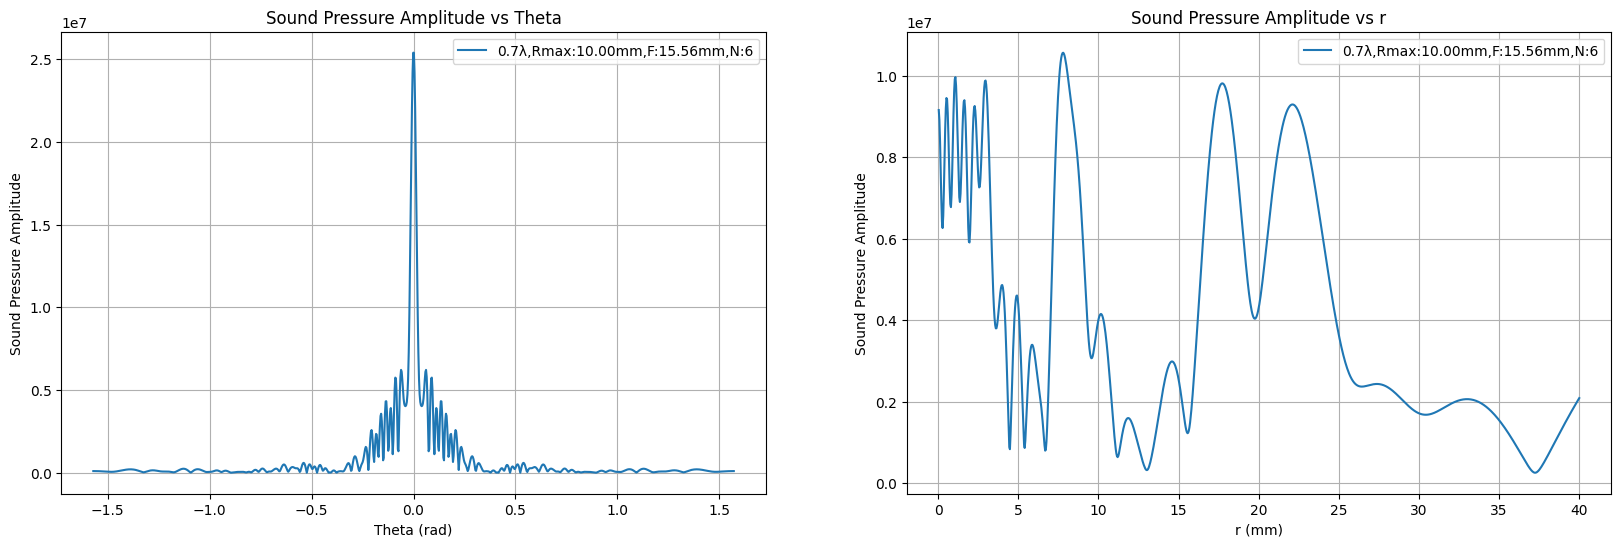

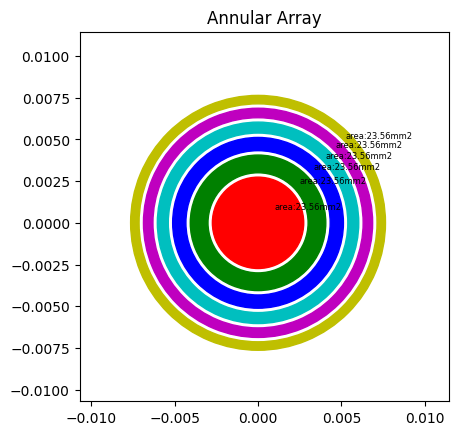

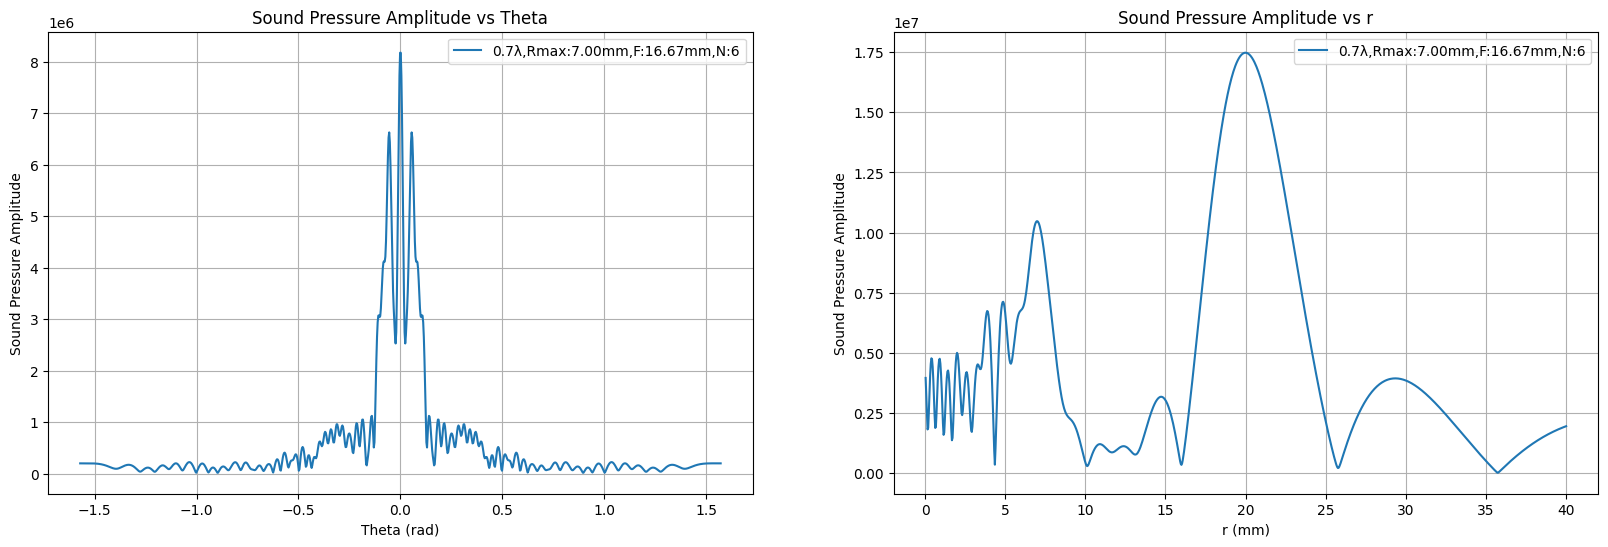

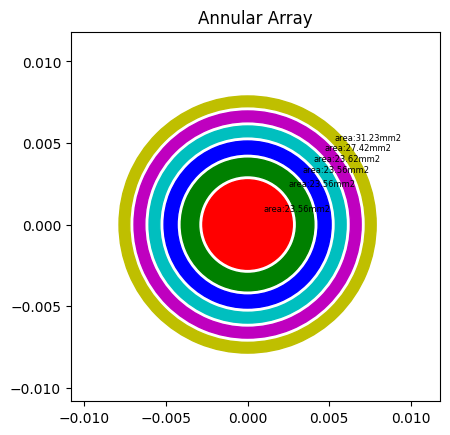

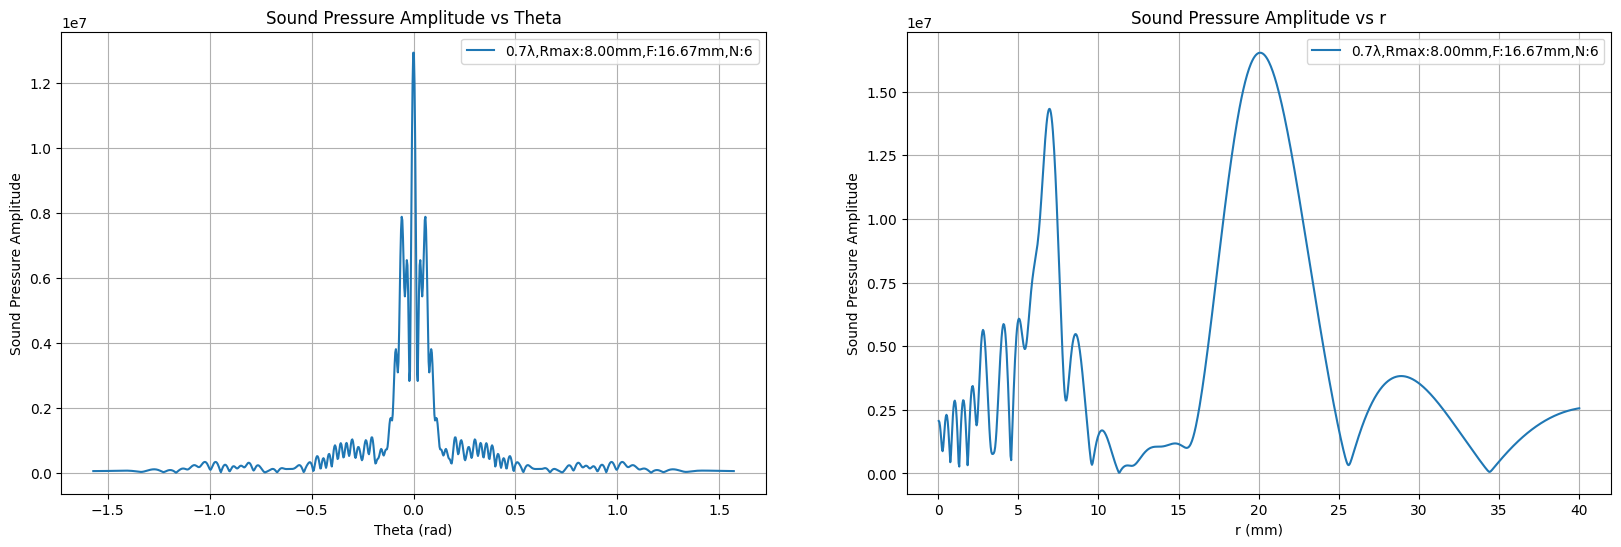

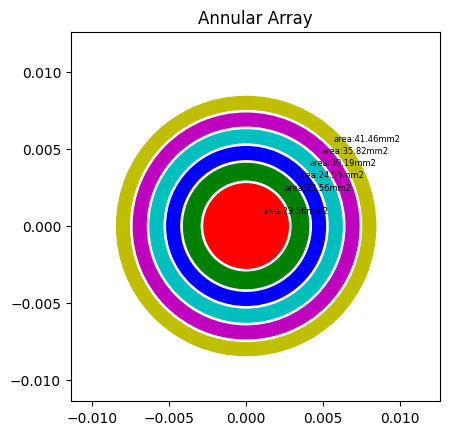

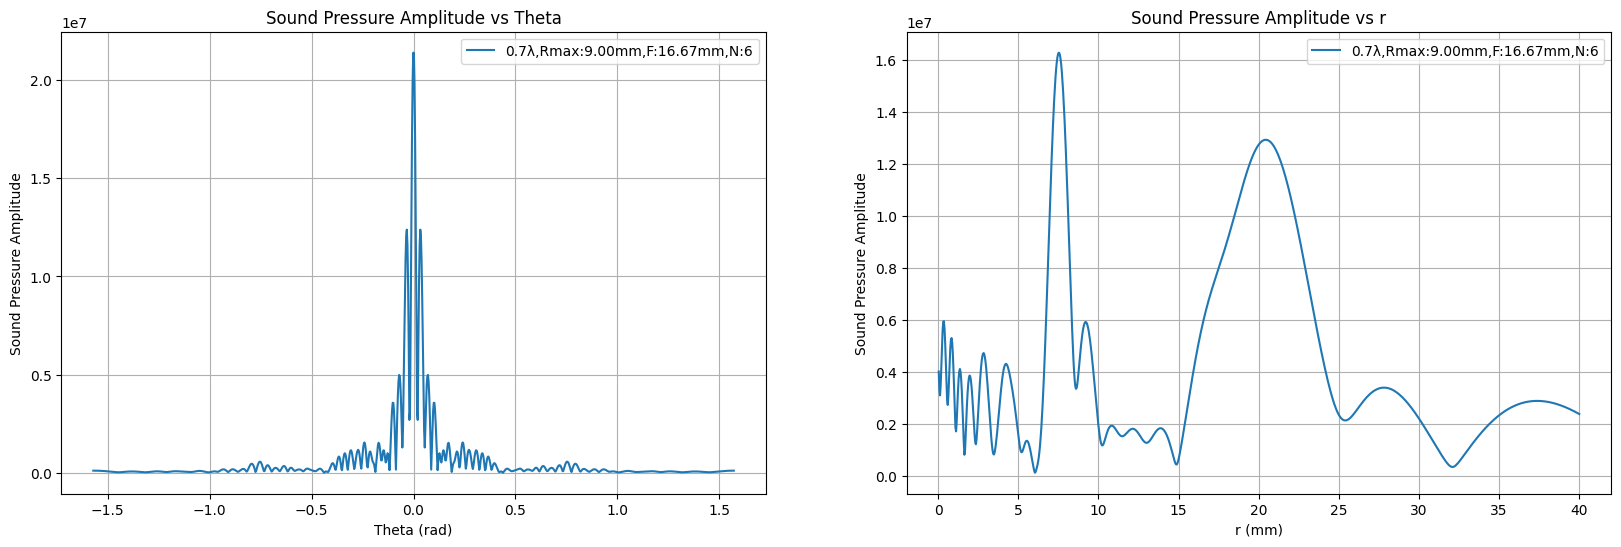

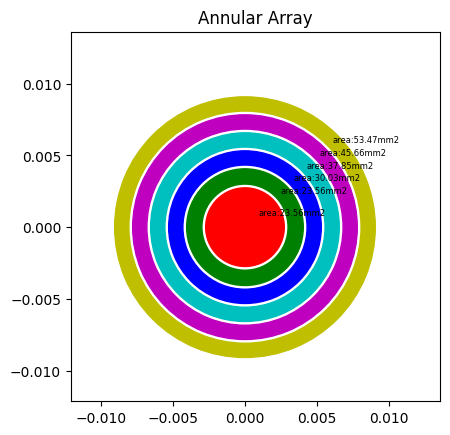

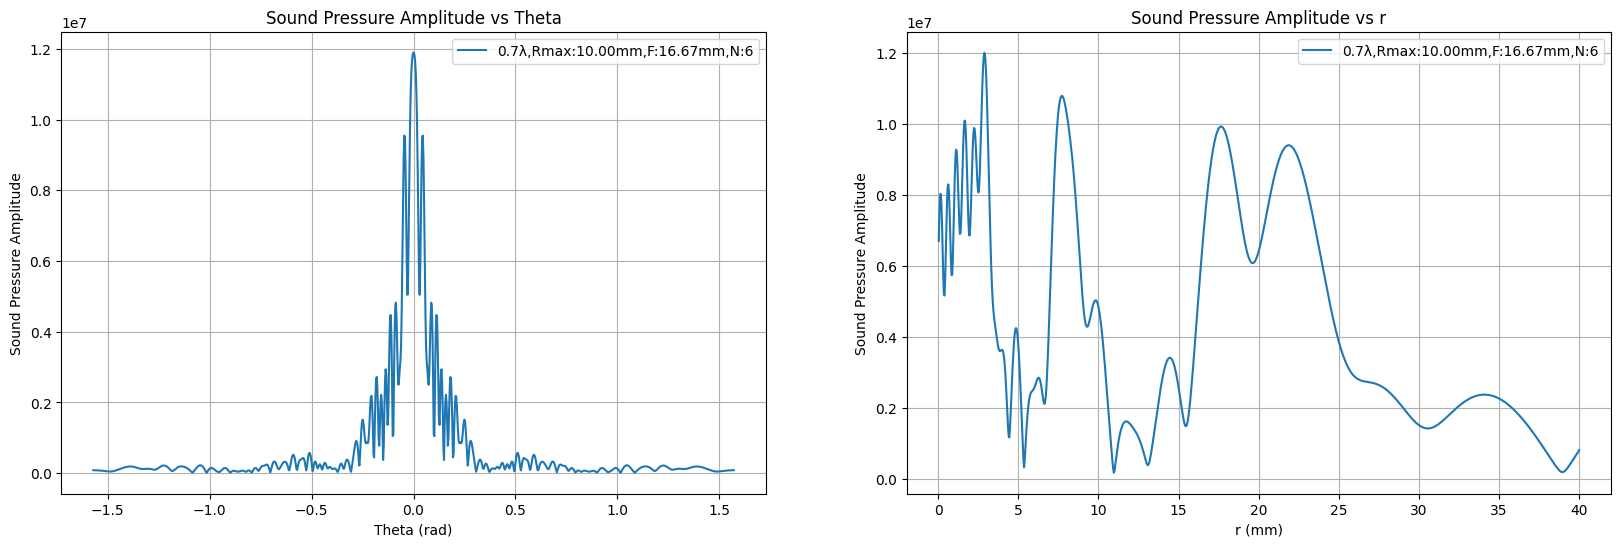

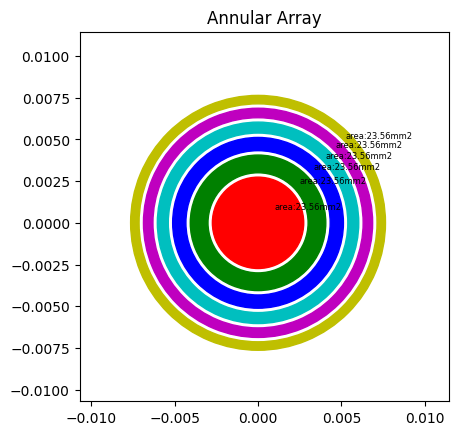

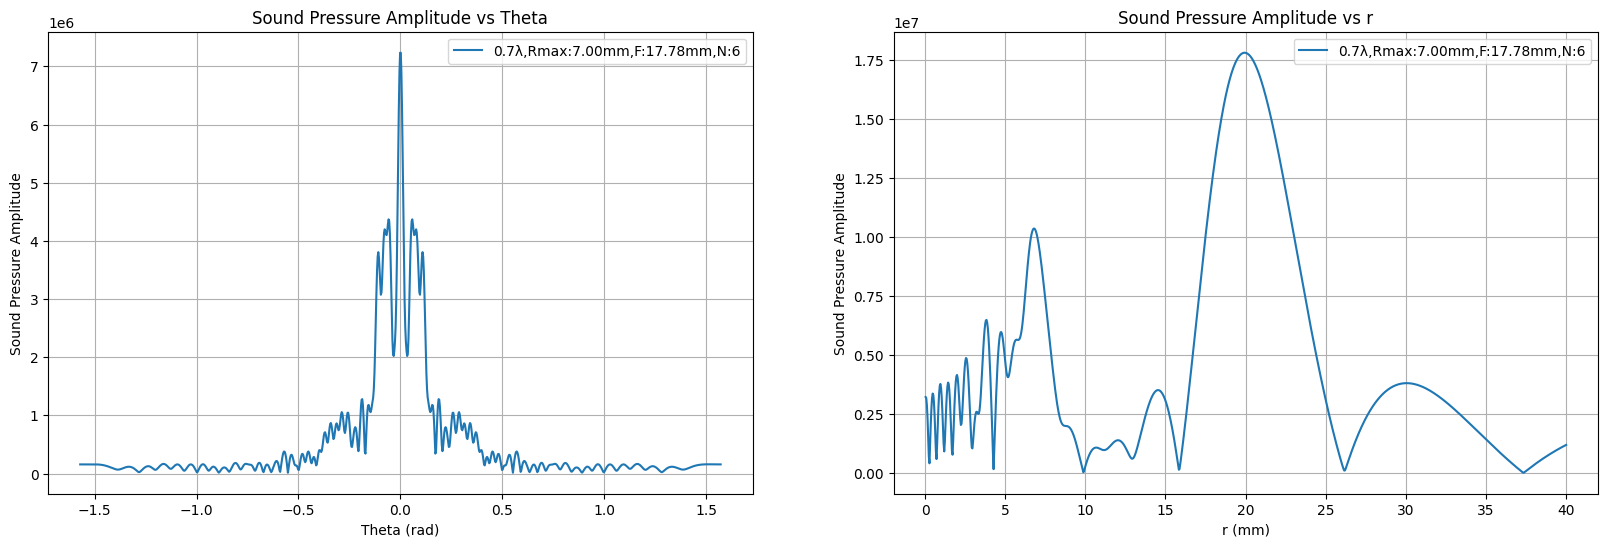

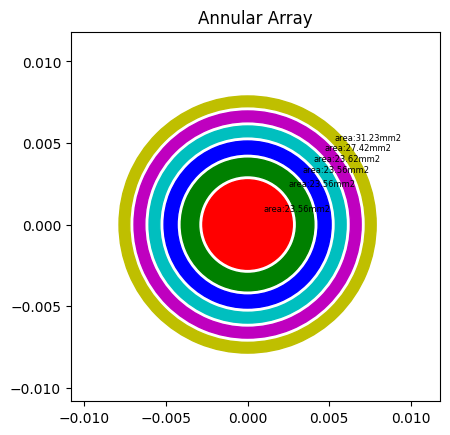

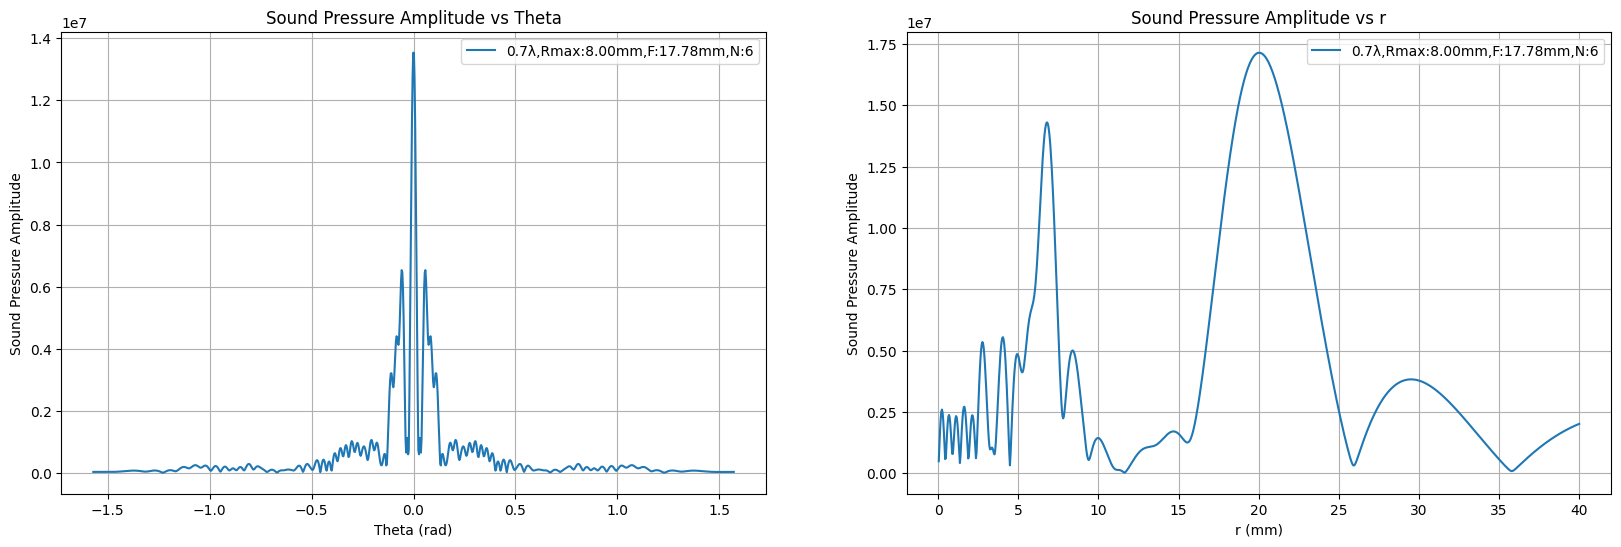

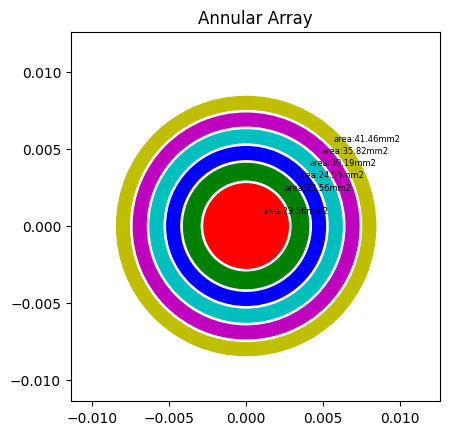

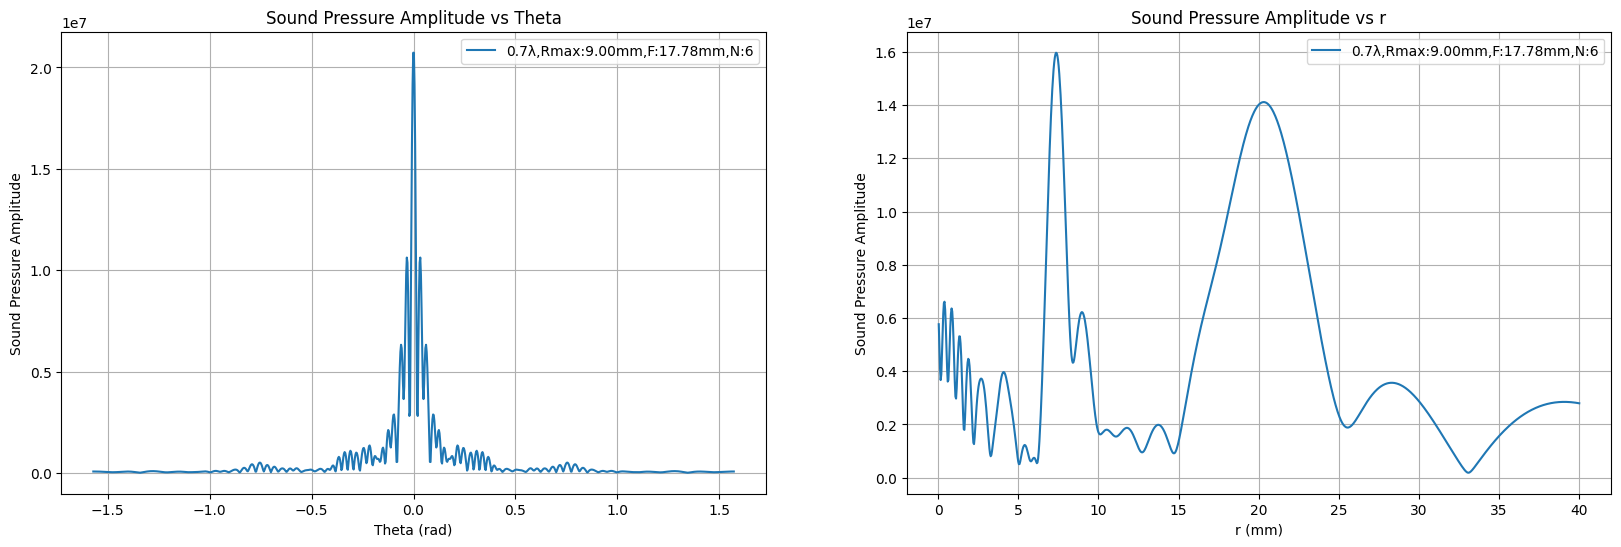

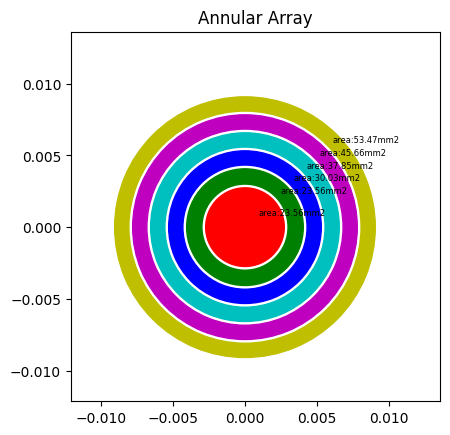

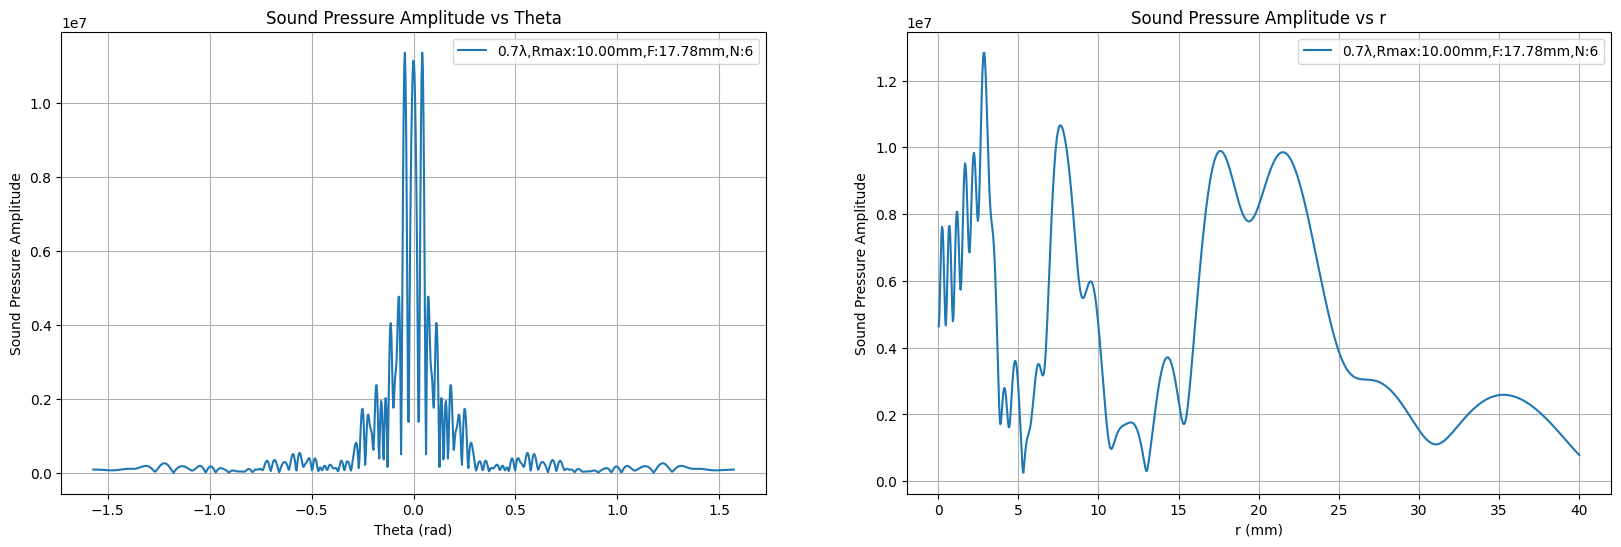

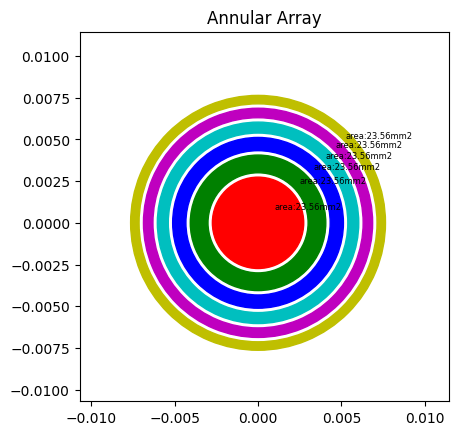

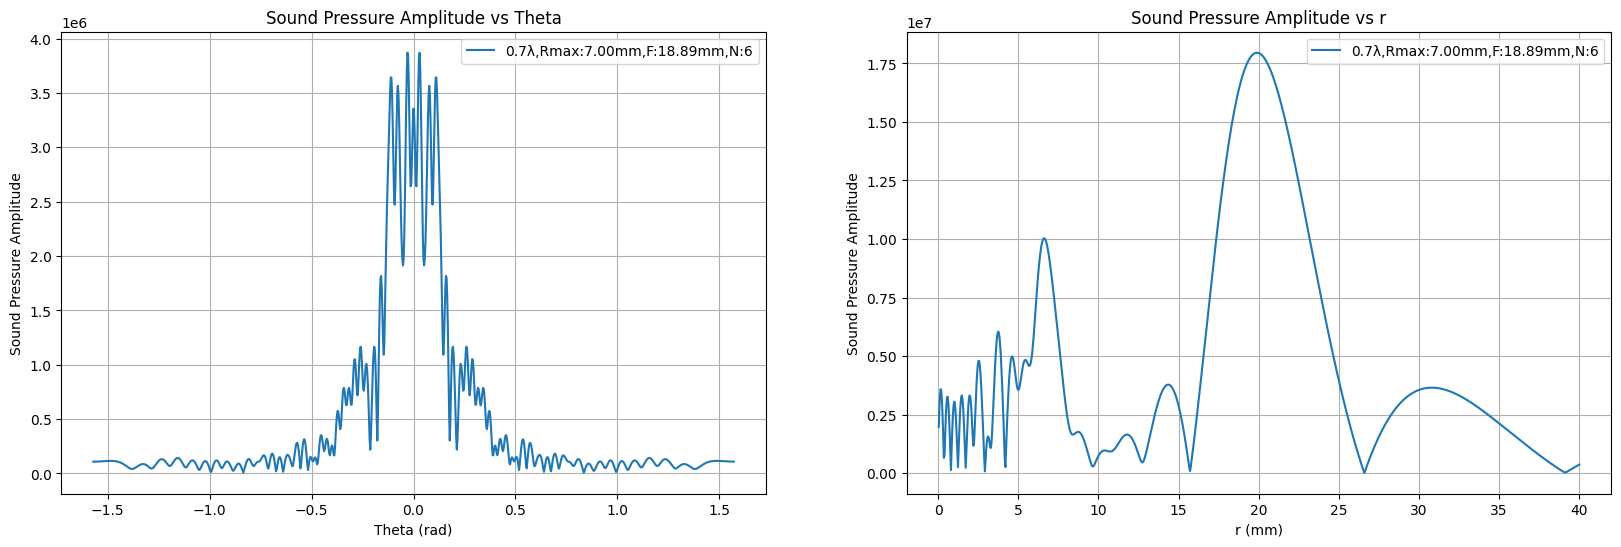

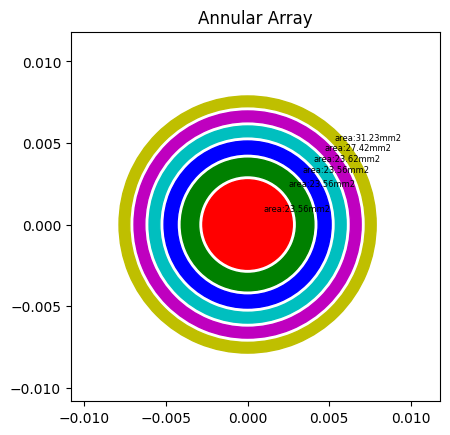

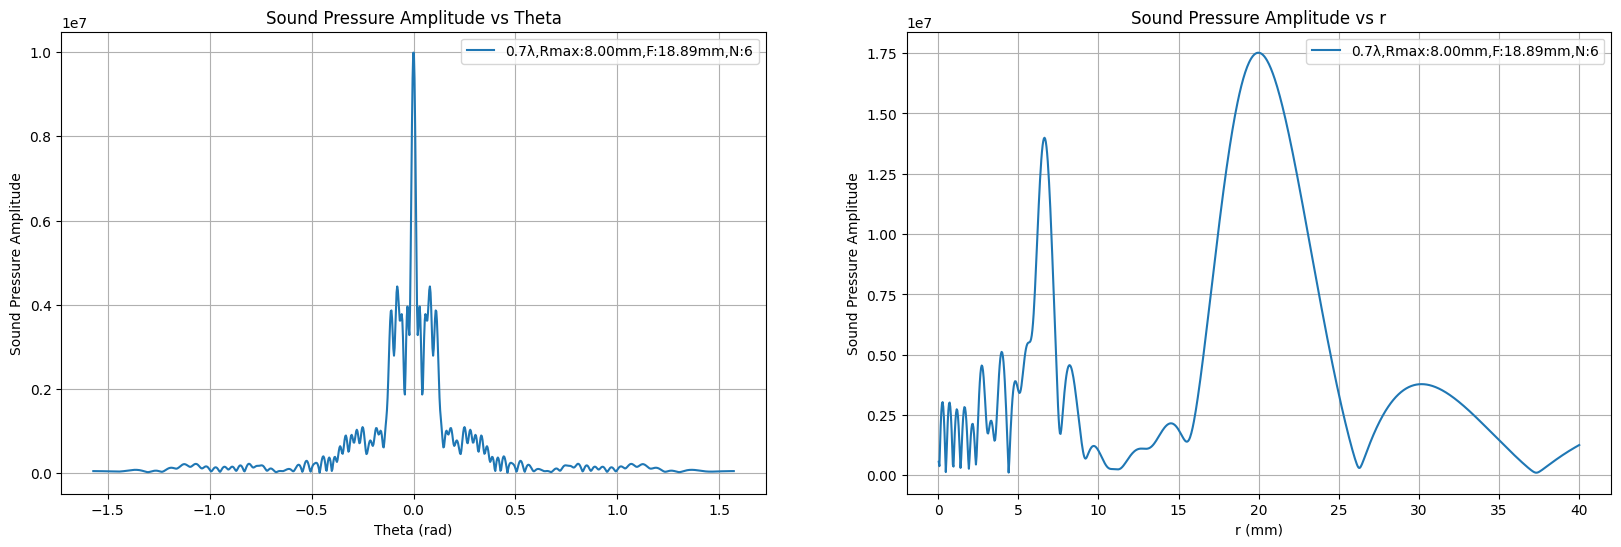

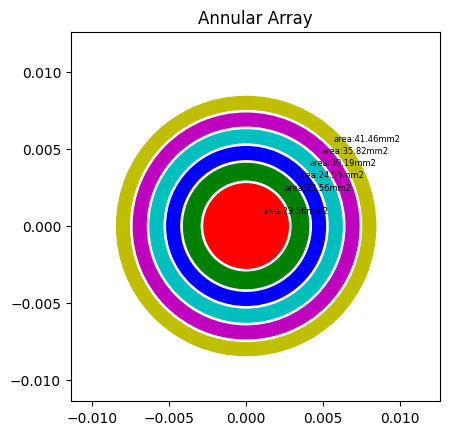

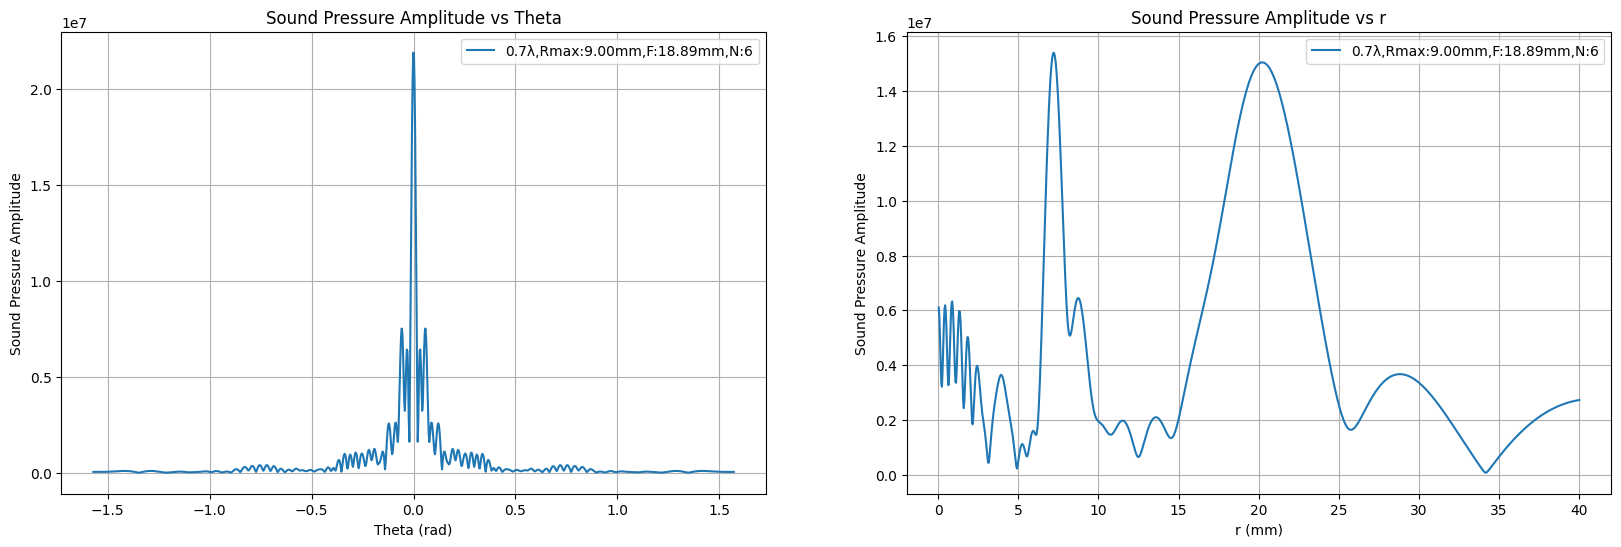

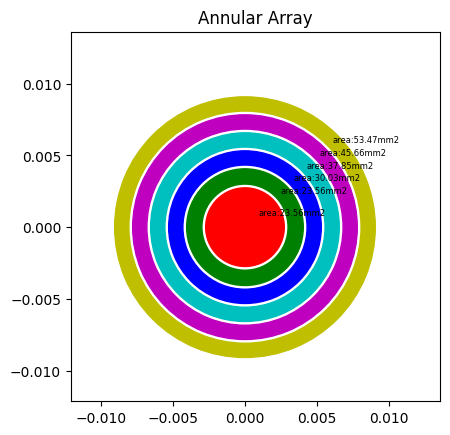

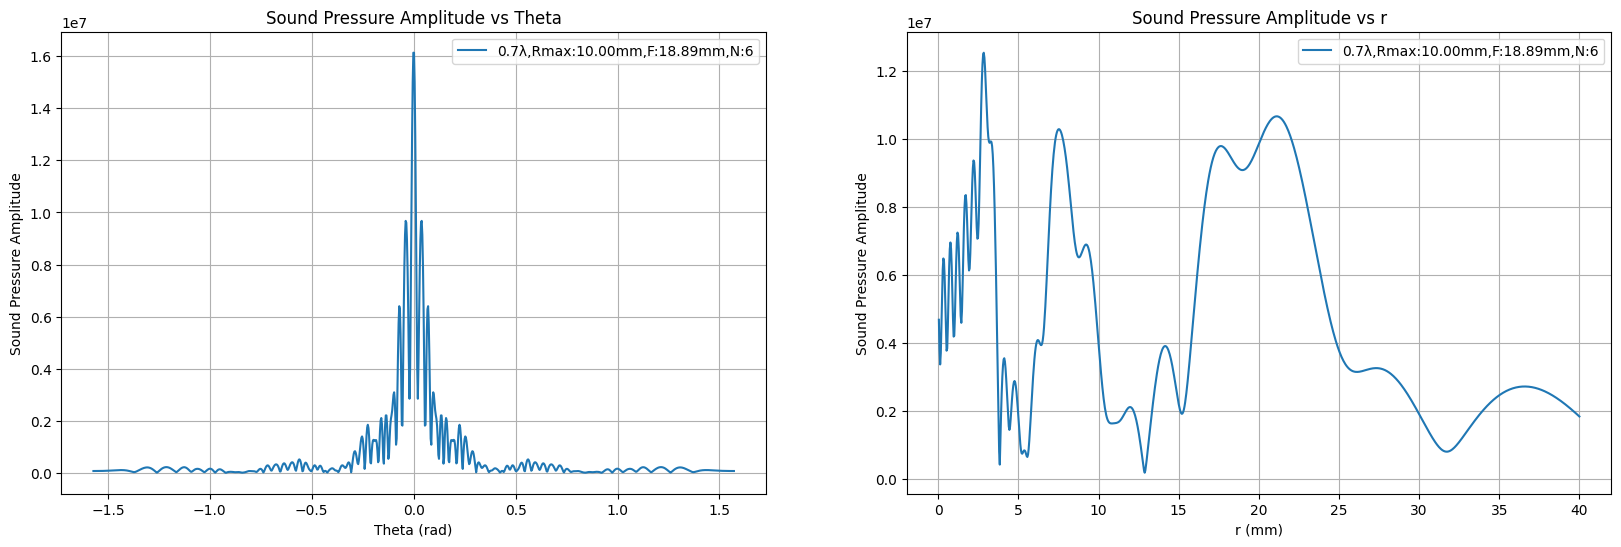

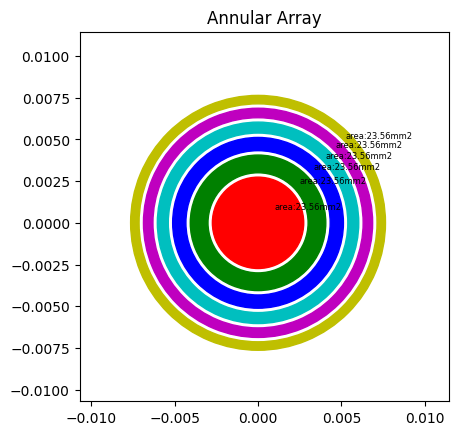

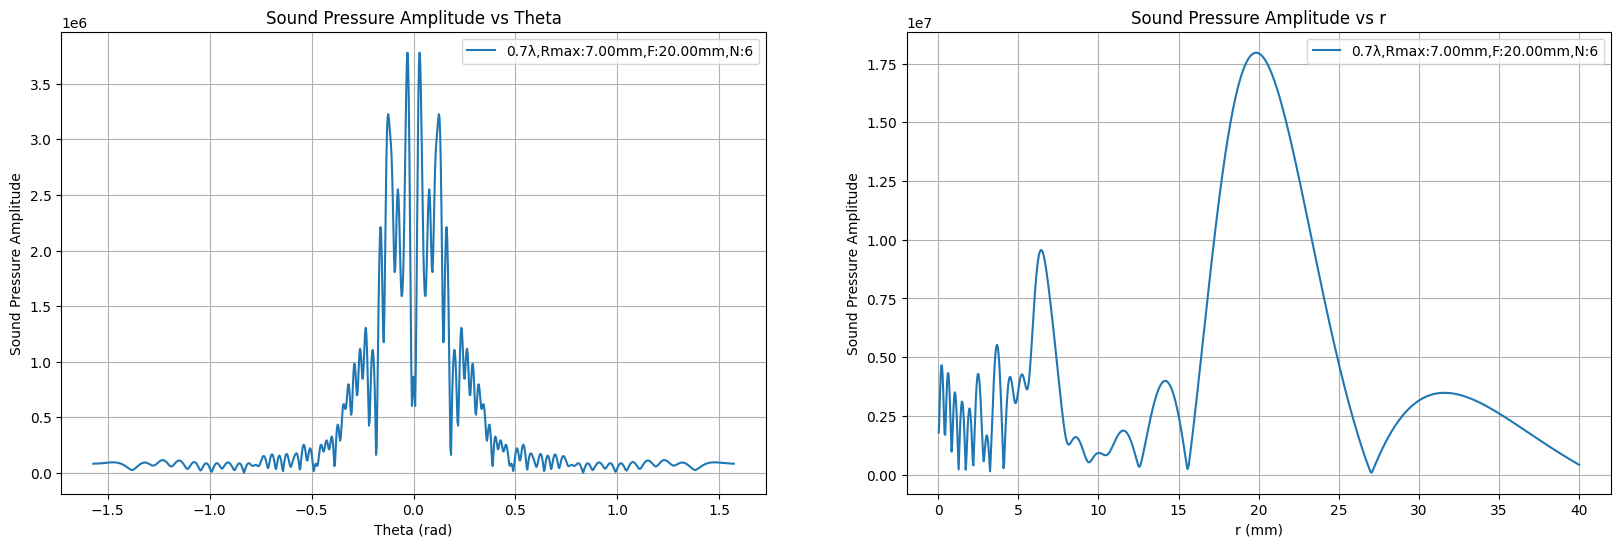

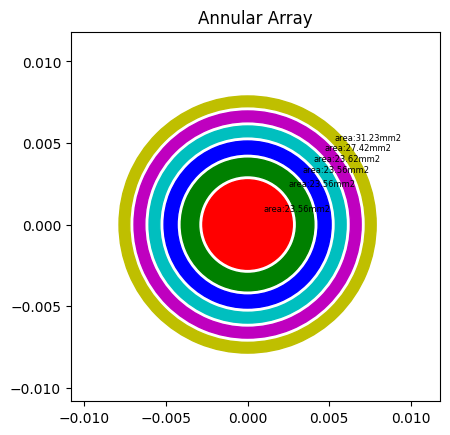

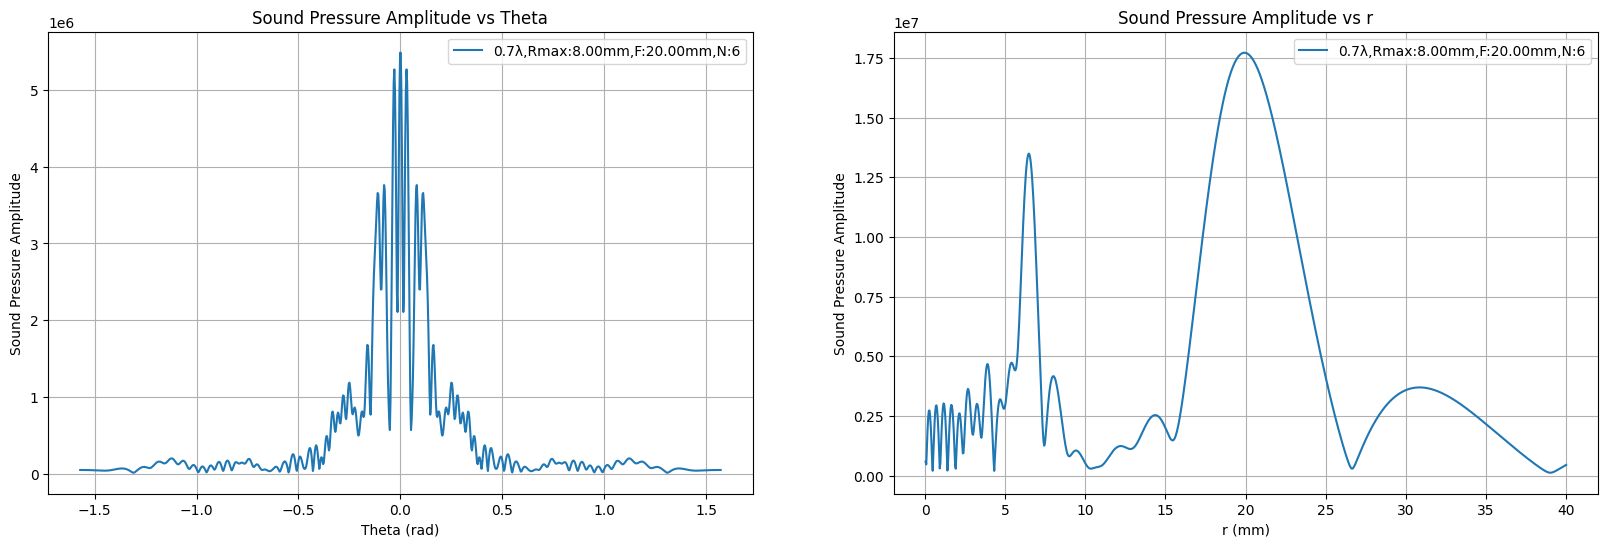

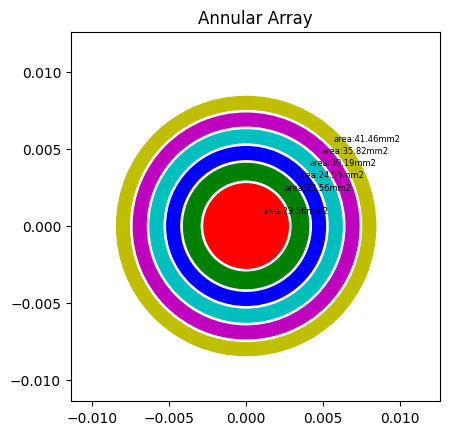

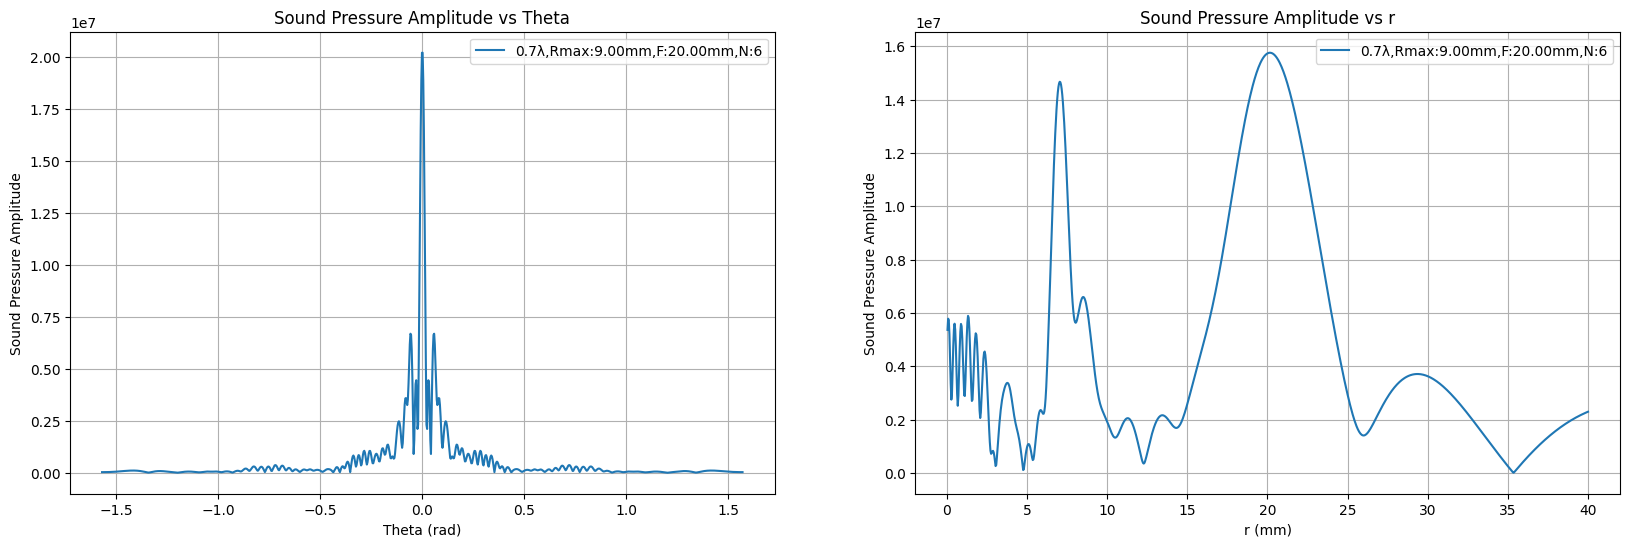

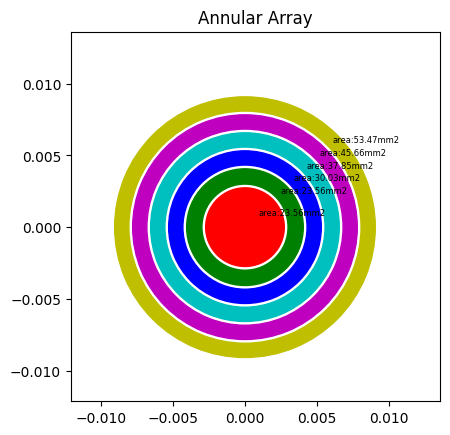

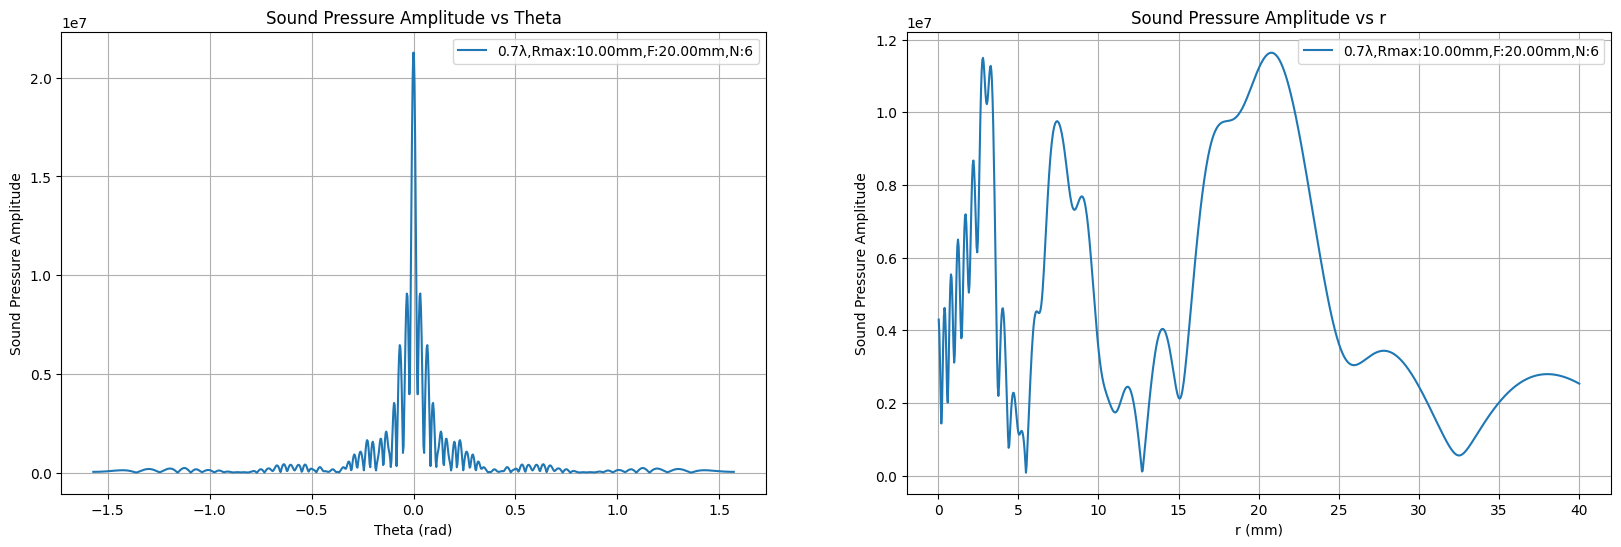

In [299]:
# 开始绘制不同 delta_d 下的声压曲线
# 设置图片清晰度
Fc = np.linspace(10e-3,20e-3,10)
rc = np.linspace(10e-3,20e-3,5)

Rm = np.linspace(7e-3,10e-3,4)
ns = np.arange(6,11,1)

pressure_amp = []

r_values = np.linspace(0.1*lambda_, F * 2,1000)  # 不同的距离 r 

for i in range(len(Fc)):
    for j in range(len(Rm)):
        Ri_list = np.zeros(m)
        Ro_list = np.zeros(m)
        Ri_list, Ro_list = calculate_annular_radii(R_max=Rm[j], m=ns[0], n=0.7, NFmax=20e-3)
        # 调用函数绘制圆环阵列
        plot_annular_array(Ri_list, Ro_list, colors)
    
        plt.figure(figsize=(20, 6))
        #print('Fc = ',Fc[i],'rc = ',Fc[i],'Rm = ',Rm[j], 'ns = ', ns[0])
        pressure_val,_ = Sound_Pressure_single(m=ns[0], F=Fc[i],r=Fc[i],R_max=Rm[j],n=0.7,theta=None,phi=0,t=0)
        plt.subplot(1,2,1)
        plt.plot(theta_values, pressure_val, label='{:.1f}λ,Rmax:{:.2f}mm,F:{:.2f}mm,N:{:d}'.format(n,Rm[j]*1e3,Fc[i]*1e3,ns[0]))
        print('') 
        plt.xlabel('Theta (rad)')
        plt.ylabel('Sound Pressure Amplitude')
        plt.title('Sound Pressure Amplitude vs Theta')     
        plt.legend()   
        plt.grid(True)
        
        _,pre = Sound_Pressure_single(m=ns[0], F=Fc[i],r=r,R_max=Rm[j],n=0.7,theta=None,phi=0,t=0)
        #print(pre)
        pressure_amp.append(np.abs(pre))    
        #print(pressure_amp)
        plt.subplot(1,2,2)
        plt.plot(r_values*1e3, pressure_amp[0],label='{:.1f}λ,Rmax:{:.2f}mm,F:{:.2f}mm,N:{:d}'.format(n,Rm[j]*1e3,Fc[i]*1e3,ns[0]))
        pressure_amp = []
        plt.xlabel('r (mm)')
        plt.ylabel('Sound Pressure Amplitude')
        plt.title('Sound Pressure Amplitude vs r')  
        plt.legend()
        plt.grid(True)
        plt.show()  

In [ ]:
plt.figure(figsize=(10, 6))   

# 定义 delta_d 数组，范围从 0.1 * lambda_ 到 2 * lambda_
Rmax_d_array = np.linspace(5e-3, 30e-3, 20)

a1_list = []
a2_list = []
mainlobe_avg_list = []
sidelobe_avg_list = []

# 开始绘制不同 delta_d 下的声压曲线
plt.figure(figsize=(20, 6))
# 设置图片清晰度
plt.rcParams['figure.dpi'] = 100

for Rmax in Rmax_d_array:
    a1_list = []
    a2_list = []
    # 调用函数计算圆环内外径
    a1_list, a2_list = calculate_annular_radii(Rmax, m, n, NFmax)
    # 调用函数绘制圆环阵列
    # plot_annular_array(a1_list, a2_list, R_max, delta_d, colors)
    # 计算每个 theta 对应的声压幅值
    pressure_values = []
    for theta in theta_values:
        pressure = annular_array_pressure(a1_list,a2_list, F, r, m, theta, phi, t)
        pressure_amplitude = np.abs(pressure)
        pressure_values.append(pressure_amplitude)
    # 将 theta 从弧度转换为角度
    theta_values_deg = np.rad2deg(theta_values)
    # 绘制声压随 theta（角度）的变化曲线
    plt.plot(theta_values_deg, pressure_values, label='Rmax:{:.2f}'.format(Rmax*1e3))
    # 调用评价函数
    mainlobe_avg, sidelobe_avg = evaluate_sidelobe_mainlobe(pressure_values)
    mainlobe_avg_list.append(mainlobe_avg)
    sidelobe_avg_list.append(sidelobe_avg)
    print(f"主瓣平均声压: {mainlobe_avg:.6f}")
    print(f"旁瓣平均声压: {sidelobe_avg:.6f}")
plt.xlabel('Theta (rad)')
plt.ylabel('Sound Pressure Amplitude')
plt.title('Sound Pressure Amplitude vs Theta')
plt.legend()
plt.grid(True)
plt.show() 


# 绘制主瓣平均声压柱状图
x_pos = np.arange(len(Rmax_d_array))
x_data = [f'{v:.3f}' for v in Rmax_d_array*1e3]

fig,ax1 = plt.subplots()
fig.set_size_inches(20, 6)
ax1.set_xticks(x_pos, x_data)

ax2 = ax1.twinx()
ax1.plot(x_pos, mainlobe_avg_list,color='red')
for i, v in enumerate(mainlobe_avg_list):
    ax1.text(x_pos[i], v, f'{v:.2e}', ha='center', va='bottom')
ax1.set_xlabel('Rmax(mm)')
ax1.set_ylabel('Mainlobe Average Sound Pressure')
ax1.legend('Mainlobe')
# plt.xlabel('delta_d')
# plt.title('Mainlobe Average Sound Pressure')    
# 显示图表
# plt.show()
    
# plt.figure(figsize=(20, 6))    
# plt.xticks(x_pos, x_data)
ax2.plot(x_pos, sidelobe_avg_list,color='blue')
ax2.set_ylabel('Sidelobe Average Sound Pressure')
for i, v in enumerate(sidelobe_avg_list):
    ax2.text(x_pos[i], v, f'{v:.2e}', ha='center', va='bottom')
ax2.legend('Sidelobe')    
# plt.xlabel('delta_d')
# plt.title('Sidelobe Average Sound Pressure')
# 显示图表
plt.show()

主瓣平均声压: 1292831.087792
旁瓣平均声压: 767076.880295
主瓣平均声压: 1487495.358495
旁瓣平均声压: 1554839.838661
主瓣平均声压: 7620404.899147
旁瓣平均声压: 1934133.270781
主瓣平均声压: 21760398.391782
旁瓣平均声压: 2165562.063037
主瓣平均声压: 15381324.751878
旁瓣平均声压: 2675005.415411
主瓣平均声压: 25450033.511437
旁瓣平均声压: 3466097.058885
主瓣平均声压: 22546719.940643
旁瓣平均声压: 3315490.610245
主瓣平均声压: 59898212.869072
旁瓣平均声压: 3585336.602288
主瓣平均声压: 65426806.080544
旁瓣平均声压: 3849082.447778
主瓣平均声压: 55802042.667562
旁瓣平均声压: 5166144.472456
主瓣平均声压: 112131763.040541
旁瓣平均声压: 4649080.592132
主瓣平均声压: 100426698.691523
旁瓣平均声压: 5757276.241832
主瓣平均声压: 69963994.574851
旁瓣平均声压: 7018281.163839
主瓣平均声压: 160775232.829331
旁瓣平均声压: 6287403.332014
主瓣平均声压: 105029376.812324
旁瓣平均声压: 7451592.680745
主瓣平均声压: 246307425.675307
旁瓣平均声压: 6030594.131070
主瓣平均声压: 102102509.938099
旁瓣平均声压: 8107345.277846
主瓣平均声压: 236632393.988393
旁瓣平均声压: 8408435.674986


<Figure size 2000x600 with 0 Axes>

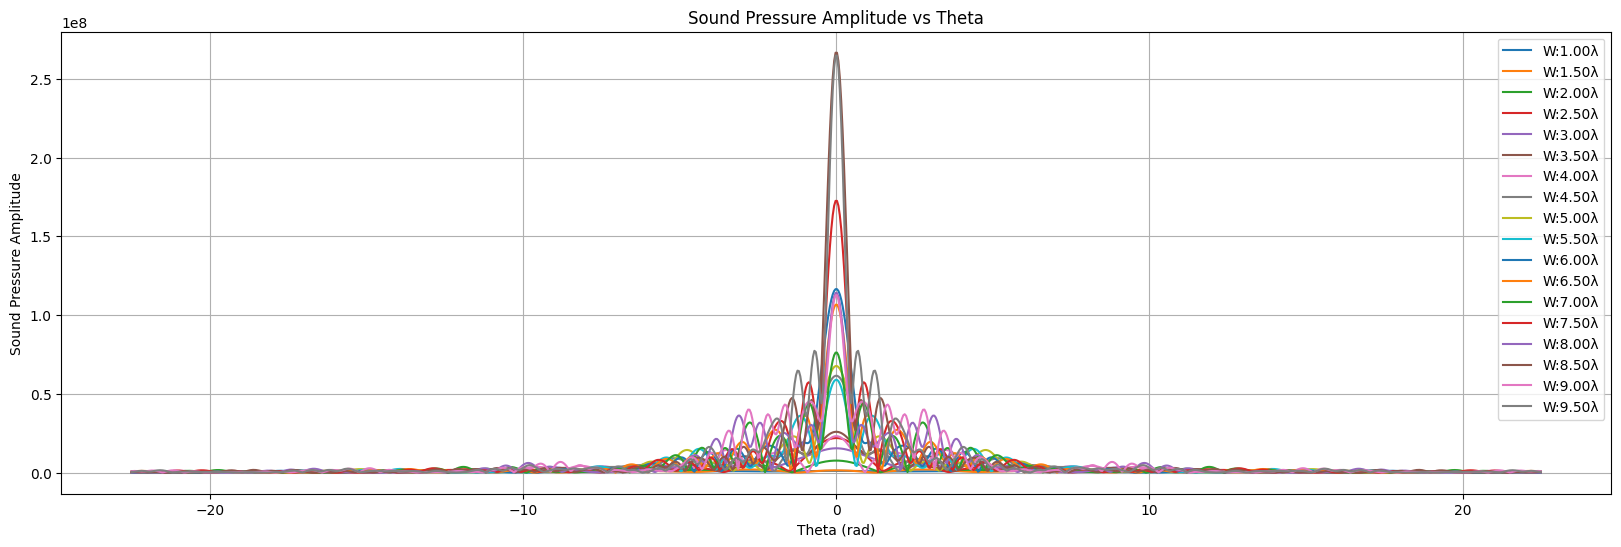

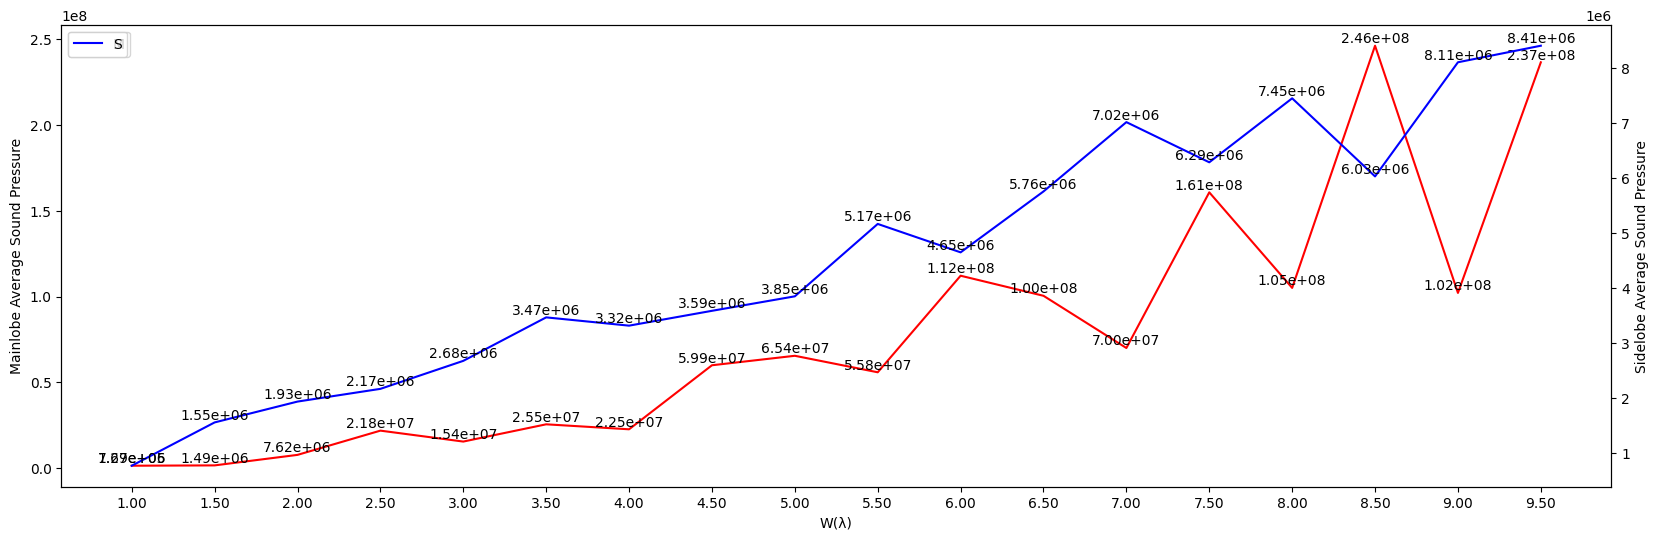

In [ ]:
plt.figure(figsize=(20, 6))   

# 固定 r、phi 和 t 的值
F = 15e-3
r = F  # 可根据需要调整 r 的值
phi = 0
t = 0
pressure = 0

delta_d = lambda_ * 0.7
# 定义 delta_d 数组，范围从 0.1 * lambda_ 到 2 * lambda_
we_d_array = np.arange(lambda_  , lambda_  * 10, lambda_ * 0.5)

a1_list = []
a2_list = []
mainlobe_avg_list = []
sidelobe_avg_list = []

# 开始绘制不同 delta_d 下的声压曲线
plt.figure(figsize=(20, 6))
# 设置图片清晰度
plt.rcParams['figure.dpi'] = 100
# 定义 theta 范围
theta_values = np.linspace(-np.pi/8 , np.pi /8, 1000)

for we_d in we_d_array:
    a1_list = []
    a2_list = []
    # 调用函数计算圆环内外径
    a1_list, a2_list = calculate_annular_radii_w(we_d, m, delta_d)
    # 调用函数绘制圆环阵列
    # plot_annular_array(a1_list, a2_list, R_max, delta_d, colors)
    # 计算每个 theta 对应的声压幅值

    pressure_values = []
    for theta in theta_values:
        pressure = annular_array_pressure(a1_list,a2_list, F, r, m, theta, phi, t)
        pressure_amplitude = np.abs(pressure)
        pressure_values.append(pressure_amplitude)   
    # 将 theta 从弧度转换为角度
    theta_values_deg = np.rad2deg(theta_values)
    # 绘制声压随 theta（角度）的变化曲线
    plt.plot(theta_values_deg, pressure_values, label='W:{:.2f}λ'.format(we_d / lambda_))
    # 调用评价函数
    mainlobe_avg, sidelobe_avg = evaluate_sidelobe_mainlobe(pressure_values)
    mainlobe_avg_list.append(mainlobe_avg)
    sidelobe_avg_list.append(sidelobe_avg)
    print(f"主瓣平均声压: {mainlobe_avg:.6f}")
    print(f"旁瓣平均声压: {sidelobe_avg:.6f}")
plt.xlabel('Theta (rad)')
plt.ylabel('Sound Pressure Amplitude')
plt.title('Sound Pressure Amplitude vs Theta')
plt.legend()
plt.grid(True)
plt.show() 


# 绘制主瓣平均声压柱状图
x_pos = np.arange(len(we_d_array))
x_data = [f'{v:.2f}' for v in we_d_array / lambda_]

fig,ax1 = plt.subplots()
fig.set_size_inches(20, 6)
ax1.set_xticks(x_pos, x_data)

ax2 = ax1.twinx()
ax1.plot(x_pos, mainlobe_avg_list,color='red')
for i, v in enumerate(mainlobe_avg_list):
    ax1.text(x_pos[i], v, f'{v:.2e}', ha='center', va='bottom')
ax1.set_xlabel('W(λ)')
ax1.set_ylabel('Mainlobe Average Sound Pressure')
ax1.legend('Mainlobe')
# plt.xlabel('delta_d')
# plt.title('Mainlobe Average Sound Pressure')    
# 显示图表
# plt.show()
    
# plt.figure(figsize=(20, 6))    
# plt.xticks(x_pos, x_data)
ax2.plot(x_pos, sidelobe_avg_list,color='blue')
ax2.set_ylabel('Sidelobe Average Sound Pressure')
for i, v in enumerate(sidelobe_avg_list):
    ax2.text(x_pos[i], v, f'{v:.2e}', ha='center', va='bottom')
ax2.legend('Sidelobe')    
# plt.xlabel('delta_d')
# plt.title('Sidelobe Average Sound Pressure')
# 显示图表
plt.show()



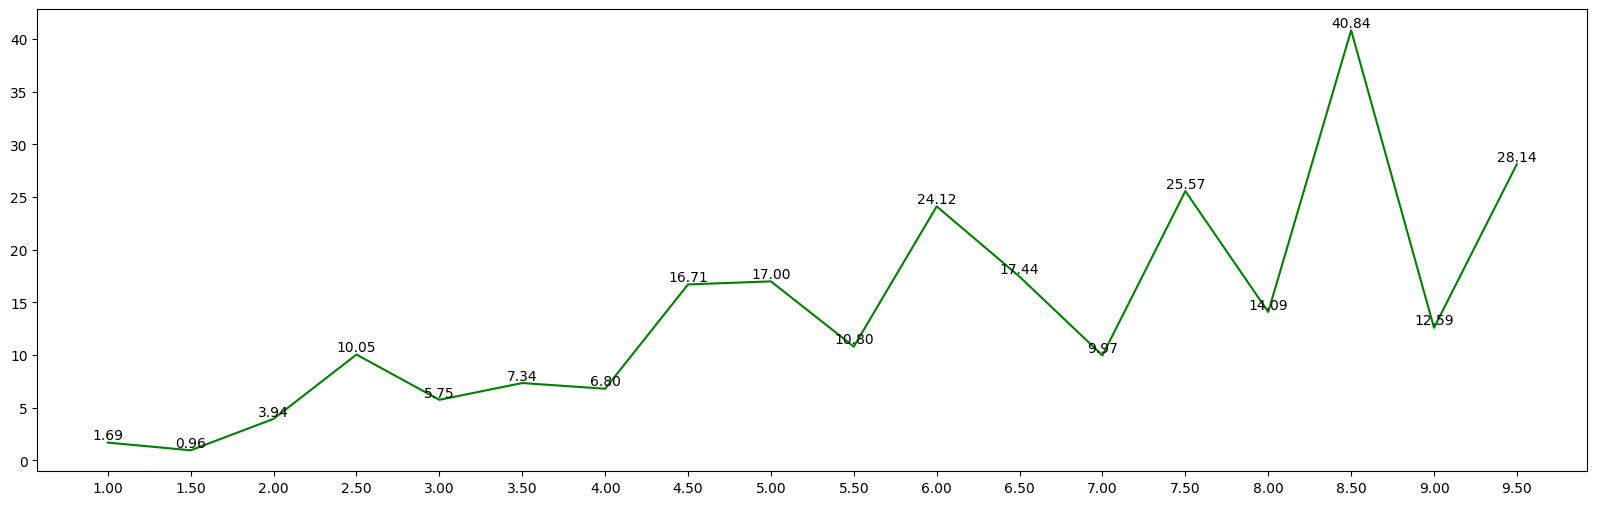

In [ ]:
plt.figure(figsize=(20, 6))
plt.xticks(x_pos, x_data)
ratio = np.array(mainlobe_avg_list)/np.array(sidelobe_avg_list)
plt.plot(x_pos,ratio,color='green')
for i, v in enumerate(ratio):
    plt.text(x_pos[i], v, f'{v:.2f}', ha='center', va='bottom')
plt.show()

主瓣平均声压: 12256435238.344402
旁瓣平均声压: 79897820.064140
主瓣平均声压: 21724315124.489147
旁瓣平均声压: 47919181.990089
主瓣平均声压: 28514212359.947243
旁瓣平均声压: 64055126.546650
主瓣平均声压: 23908830829.983734
旁瓣平均声压: 56386167.734935
主瓣平均声压: 34380938480.050316
旁瓣平均声压: 104012664.684623
主瓣平均声压: 36382632098.657440
旁瓣平均声压: 85265438.318050
主瓣平均声压: 26090431459.460388
旁瓣平均声压: 90121733.275481
主瓣平均声压: 17604592747.718708
旁瓣平均声压: 79802073.031877
主瓣平均声压: 49997363000.538239
旁瓣平均声压: 87404088.749252
主瓣平均声压: 29624915999.845818
旁瓣平均声压: 110341255.603032
主瓣平均声压: 27022555921.065742
旁瓣平均声压: 120345653.812036
主瓣平均声压: 37874611445.948990
旁瓣平均声压: 91274450.588043
主瓣平均声压: 25924293256.054420
旁瓣平均声压: 104509401.300183
主瓣平均声压: 60147332900.982140
旁瓣平均声压: 110283581.509219


<Figure size 1000x600 with 0 Axes>

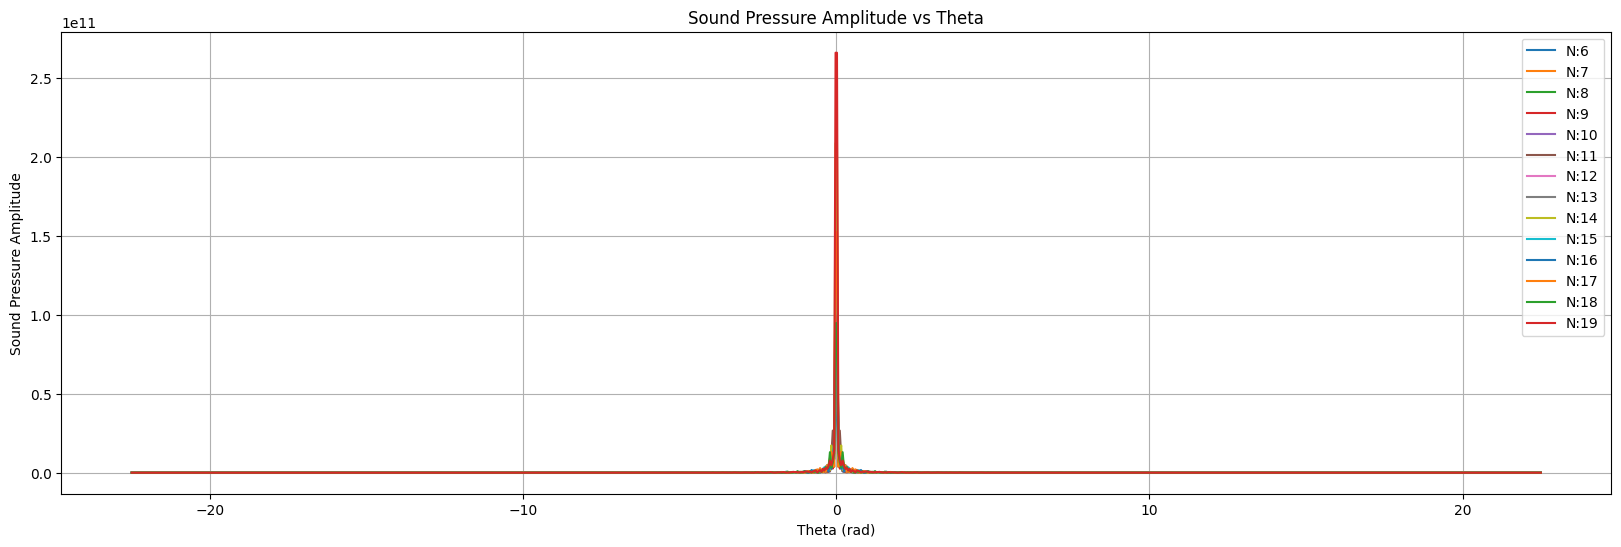

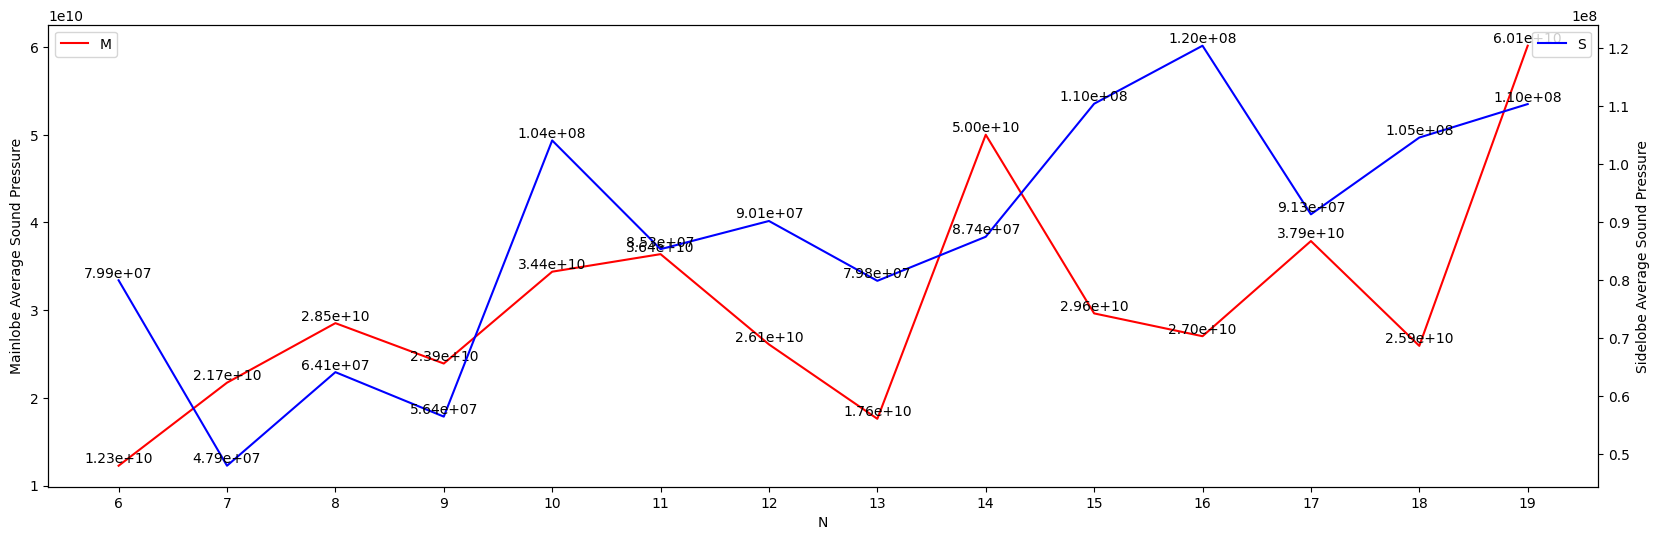

In [ ]:
plt.figure(figsize=(10, 6))   

# 固定 r、phi 和 t 的值
r = F  # 可根据需要调整 r 的值
phi = 0
t = 0
pressure = 0
R_max = 25e-3
# 定义 delta_d 数组，范围从 0.1 * lambda_ 到 2 * lambda_
n_d_array = np.arange(6, 20, 1)

a1_list = []
a2_list = []
mainlobe_avg_list = []
sidelobe_avg_list = []

# 开始绘制不同 delta_d 下的声压曲线
plt.figure(figsize=(20, 6))
# 设置图片清晰度
plt.rcParams['figure.dpi'] = 100

for n_d in n_d_array:
    a1_list = []
    a2_list = []
    # 调用函数计算圆环内外径
    delta_d = (n_d - 1) / n_d
    a1_list, a2_list = calculate_annular_radii(R_max, n_d, delta_d)
    # 调用函数绘制圆环阵列
    # plot_annular_array(a1_list, a2_list, R_max, delta_d, colors)
    # 计算每个 theta 对应的声压幅值

    pressure_values = []
    for theta in theta_values:
        pressure = annular_array_pressure(a1_list, a2_list, F, r, n_d, theta, phi, t)
        pressure_amplitude = np.abs(pressure)
        pressure_values.append(pressure_amplitude)   
    # 将 theta 从弧度转换为角度
    theta_values_deg = np.rad2deg(theta_values)
    # 绘制声压随 theta（角度）的变化曲线
    plt.plot(theta_values_deg, pressure_values, label='N:{:d}'.format(n_d))
    # 调用评价函数
    mainlobe_avg, sidelobe_avg = evaluate_sidelobe_mainlobe(pressure_values)
    mainlobe_avg_list.append(mainlobe_avg)
    sidelobe_avg_list.append(sidelobe_avg)
    print(f"主瓣平均声压: {mainlobe_avg:.6f}")
    print(f"旁瓣平均声压: {sidelobe_avg:.6f}")
plt.xlabel('Theta (rad)')
plt.ylabel('Sound Pressure Amplitude')
plt.title('Sound Pressure Amplitude vs Theta')
plt.legend()
plt.grid(True)
plt.show() 


# 绘制主瓣平均声压柱状图
x_pos = np.arange(len(n_d_array))
x_data = [f'{v:d}' for v in n_d_array]

fig,ax1 = plt.subplots()
fig.set_size_inches(20, 6)
ax1.set_xticks(x_pos, x_data)

ax2 = ax1.twinx()
ax1.plot(x_pos, mainlobe_avg_list,color='red')
for i, v in enumerate(mainlobe_avg_list):
    ax1.text(x_pos[i], v, f'{v:.2e}', ha='center', va='bottom')
ax1.set_xlabel('N')
ax1.set_ylabel('Mainlobe Average Sound Pressure')
ax1.legend('Mainlobe')
# plt.xlabel('delta_d')
# plt.title('Mainlobe Average Sound Pressure')    
# 显示图表
# plt.show()
    
# plt.figure(figsize=(20, 6))    
# plt.xticks(x_pos, x_data)
ax2.plot(x_pos, sidelobe_avg_list,color='blue')
ax2.set_ylabel('Sidelobe Average Sound Pressure')
for i, v in enumerate(sidelobe_avg_list):
    ax2.text(x_pos[i], v, f'{v:.2e}', ha='center', va='bottom')
ax2.legend('Sidelobe')    
# plt.xlabel('delta_d')
# plt.title('Sidelobe Average Sound Pressure')
# 显示图表
plt.show()



主瓣平均声压: 32250040096.870361
旁瓣平均声压: 105464295.323828
主瓣平均声压: 28954365570.743938
旁瓣平均声压: 96583395.889214
主瓣平均声压: 27211323204.462872
旁瓣平均声压: 88588101.135543
主瓣平均声压: 25869127275.482204
旁瓣平均声压: 82445425.969932
主瓣平均声压: 24722226525.742706
旁瓣平均声压: 75848162.710441
主瓣平均声压: 23697839905.507004
旁瓣平均声压: 69824204.418054
主瓣平均声压: 22738265638.899532
旁瓣平均声压: 62302957.460574
主瓣平均声压: 21794924345.519032
旁瓣平均声压: 40662456.563010
主瓣平均声压: 20826541227.284237
旁瓣平均声压: 39877733.107111
主瓣平均声压: 19798690904.253288
旁瓣平均声压: 39216101.158996
主瓣平均声压: 18684092249.530296
旁瓣平均声压: 38965685.190401
主瓣平均声压: 17463381413.753246
旁瓣平均声压: 38398856.398456
主瓣平均声压: 16126271577.702793
旁瓣平均声压: 39191905.421766
主瓣平均声压: 14673601474.387981
旁瓣平均声压: 40731751.610368
主瓣平均声压: 13129298136.273012
旁瓣平均声压: 39603681.532264
主瓣平均声压: 11819429359.239580
旁瓣平均声压: 40511305.185140
主瓣平均声压: 10737885229.965925
旁瓣平均声压: 36481349.093529
主瓣平均声压: 9603979336.204544
旁瓣平均声压: 33459200.700382
主瓣平均声压: 8440597401.052698
旁瓣平均声压: 31240092.774763
主瓣平均声压: 7300454095.355090
旁瓣平均声压

<Figure size 1000x600 with 0 Axes>

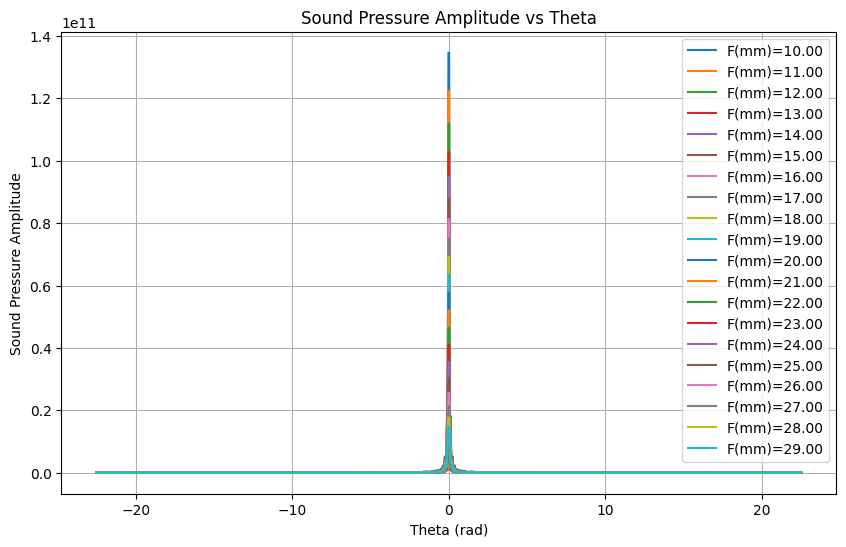

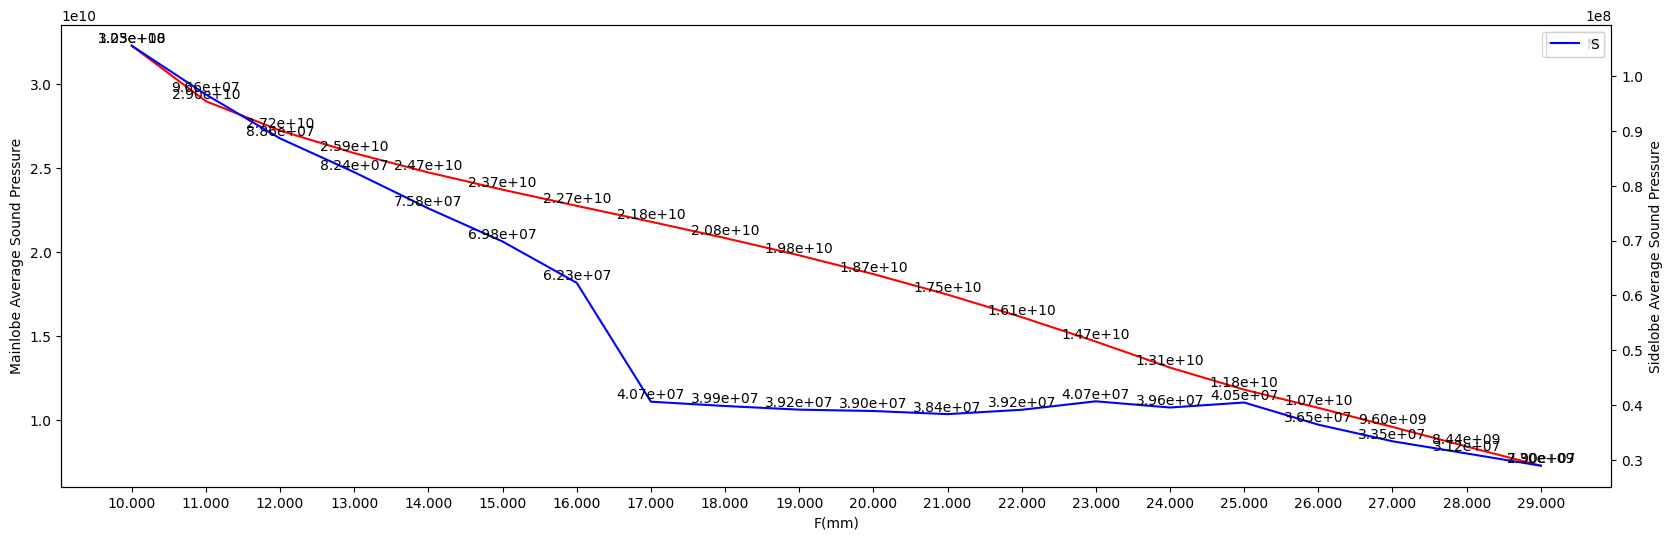

In [ ]:
plt.figure(figsize=(10, 6))   

# 定义 delta_d 数组，范围从 0.1 * lambda_ 到 2 * lambda_
F_array = np.arange(10e-3, 30e-3, 1e-3)

a1_list = []
a2_list = []
mainlobe_avg_list = []
sidelobe_avg_list = []

# 开始绘制不同 delta_d 下的声压曲线
plt.figure(figsize=(10, 6))
# 设置图片清晰度
plt.rcParams['figure.dpi'] = 100

for F_d in F_array:
    a1_list = []
    a2_list = []
    # 调用函数计算圆环内外径
    a1_list, a2_list = calculate_annular_radii(R_max, m, delta_d)
    # 调用函数绘制圆环阵列
    # plot_annular_array(a1_list, a2_list, R_max, delta_d, colors)
    # 计算每个 theta 对应的声压幅值
    pressure_values = []
    for theta in theta_values:
        pressure = annular_array_pressure(a1_list, a2_list, F_d, F_d, m, theta, phi, t)
        pressure_amplitude = np.abs(pressure)
        pressure_values.append(pressure_amplitude)
    # 将 theta 从弧度转换为角度
    theta_values_deg = np.rad2deg(theta_values)
    # 绘制声压随 theta（角度）的变化曲线
    plt.plot(theta_values_deg, pressure_values, label='F(mm)={:.2f}'.format(F_d*1000))
    # 调用评价函数
    mainlobe_avg, sidelobe_avg = evaluate_sidelobe_mainlobe(pressure_values)
    mainlobe_avg_list.append(mainlobe_avg)
    sidelobe_avg_list.append(sidelobe_avg)
    print(f"主瓣平均声压: {mainlobe_avg:.6f}")
    print(f"旁瓣平均声压: {sidelobe_avg:.6f}")
plt.xlabel('Theta (rad)')
plt.ylabel('Sound Pressure Amplitude')
plt.title('Sound Pressure Amplitude vs Theta')
plt.legend()
plt.grid(True)
plt.show() 


# 绘制主瓣平均声压柱状图
x_pos = np.arange(len(F_array))
x_data = [f'{v:.3f}' for v in F_array*1e3]

fig,ax1 = plt.subplots()
fig.set_size_inches(20, 6)

ax1.set_xticks(x_pos, x_data)
ax1.plot(x_pos, mainlobe_avg_list,color='red')
for i, v in enumerate(mainlobe_avg_list):
    ax1.text(x_pos[i], v, f'{v:.2e}', ha='center', va='bottom')
ax1.set_xlabel('F(mm)')
ax1.set_ylabel('Mainlobe Average Sound Pressure')
ax1.legend('Mainlobe')

ax2 = ax1.twinx()
ax2.plot(x_pos, sidelobe_avg_list,color='blue')
for i, v in enumerate(sidelobe_avg_list):
    ax2.text(x_pos[i], v, f'{v:.2e}', ha='center', va='bottom')
ax2.set_ylabel('Sidelobe Average Sound Pressure')    
ax2.legend('Sidelobe')

plt.show()


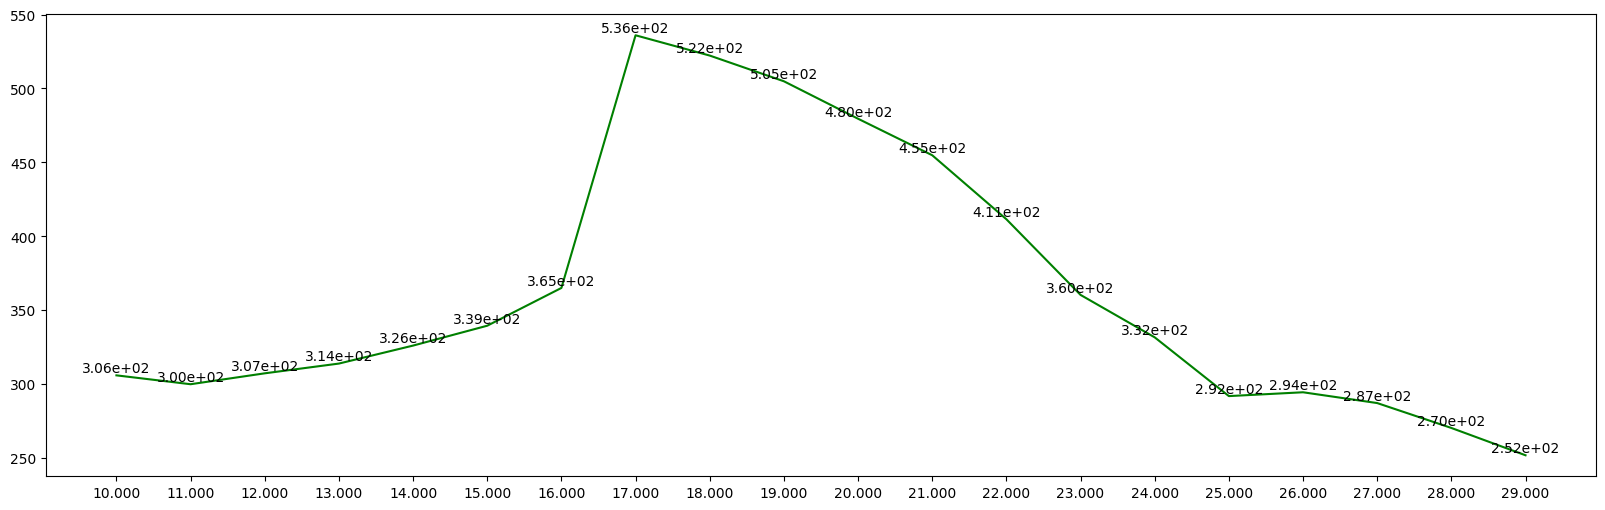

In [ ]:
plt.figure(figsize=(20, 6))
plt.xticks(x_pos, x_data)
ratio = np.array(mainlobe_avg_list)/np.array(sidelobe_avg_list)
plt.plot(x_pos,ratio,color='green')
for i, v in enumerate(ratio):
    plt.text(x_pos[i], v, f'{v:.2e}', ha='center', va='bottom')
plt.show()

Gap:0.40[λ]


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

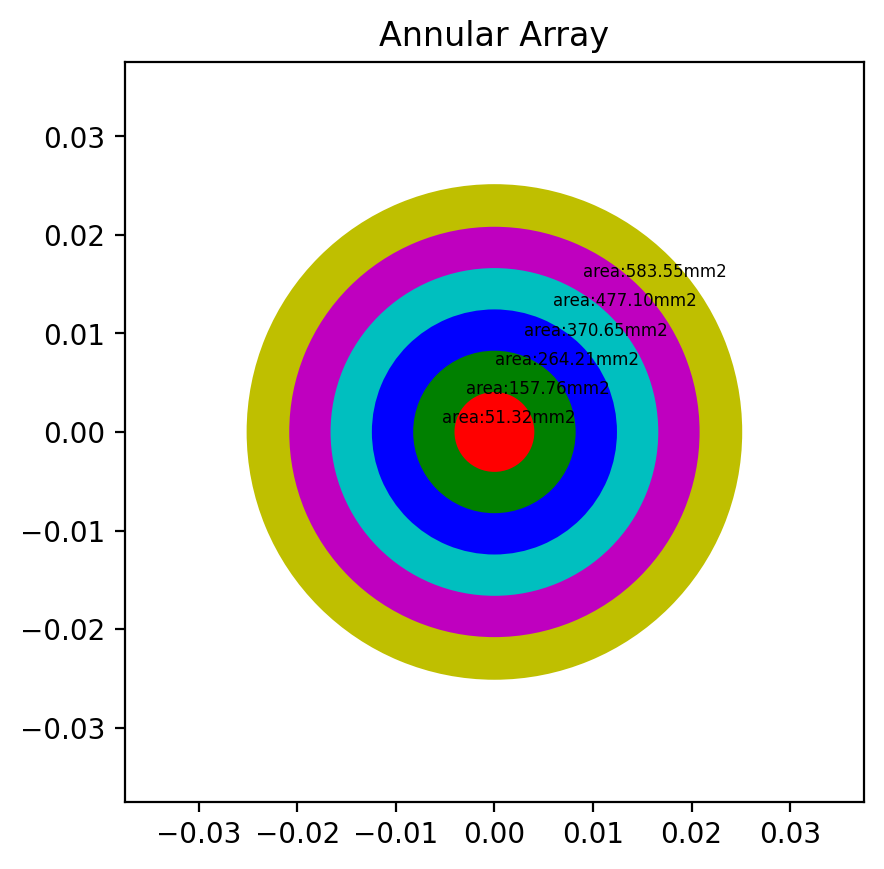

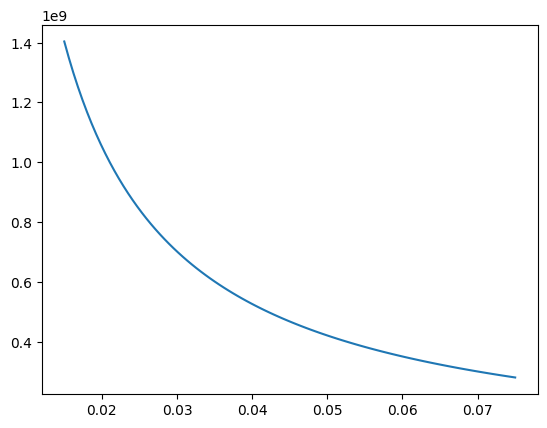

In [ ]:
plt.figure(figsize=(10, 6))   

# 定义 delta_d 数组，范围从 0.1 * lambda_ 到 2 * lambda_
dis_array = np.linspace(F, 5*F, 100)

a1_list = []
a2_list = []

delta_d = lambda_ * 0.7
# 开始绘制不同 delta_d 下的声压曲线
plt.figure(figsize=(10, 6))
# 设置图片清晰度
plt.rcParams['figure.dpi'] = 100
# 调用函数计算圆环内外径
a1_list, a2_list = calculate_annular_radii(R_max, m, delta_d)
# 调用函数绘制圆环阵列
plot_annular_array(a1_list, a2_list, R_max, delta_d, colors)
# 计算每个 theta 对应的声压幅值
pressure_values = []
    
for dis in dis_array:
    pressure = annular_array_pressure(a1_list, a2_list, F, dis, m, 0, 0, t)
    pressure_amplitude = np.abs(pressure)
    pressure_values.append(pressure_amplitude)
plt.plot(dis_array, pressure_values)
plt.show() 

Gap:34.80[λ]


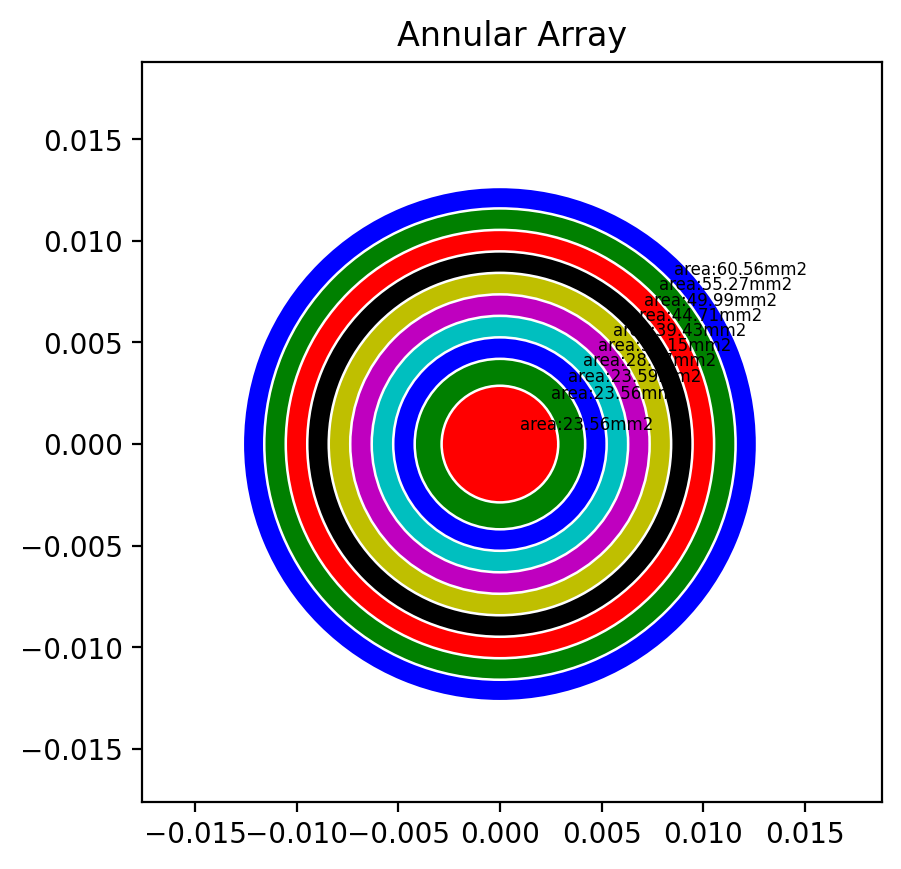

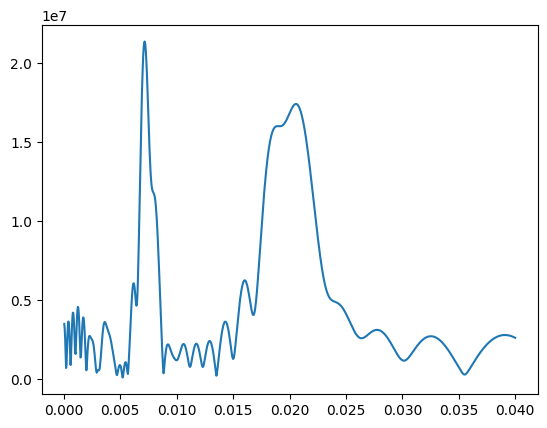

In [ ]:
# 近场声压计算
# 计算相位延迟
F = 20e-3
NFmax = 20e-3
R_max = 13.05e-3
m = 10
n = 0.7
delta_d = n * lambda_

r_values = np.linspace(0.1*lambda_, F * 2,1000)  # 不同的距离 r
pressure_amplitudes = []

a1_list = np.zeros(m)
a2_list = np.zeros(m)

# 调用函数计算圆环内外径
a1_list, a2_list = calculate_annular_radii(R_max, m, n, NFmax)
# 调用函数绘制圆环阵列
plot_annular_array(a1_list, a2_list, R_max, colors)
# 计算单个圆环的声压
# 定义声压公式，考虑分母为 0 的情况
def annular_array_pressure_axis(a1_list,a2_list, m, F, r, t):
    p_total = 0
    
    Rm_max = 2/3*(a2_list[m-1]**3 - a2_list[m-2]**3)/(a2_list[m-1]**2-a2_list[m-2]**2)
    # print("Rm_max: ", Rm_max)
    
    for i in range(m):
        a1 = a1_list[i]
        a2 = a2_list[i]
        R_m = 2/3*(a2**3 - a1**3)/(a2**2-a1**2)

        t_m = np.sqrt(Rm_max ** 2 + F ** 2) - np.sqrt(R_m ** 2 + F ** 2)
        t1 = np.sqrt(a1 ** 2 + r ** 2) 
        t2 = np.sqrt(a2 ** 2 + r ** 2)
        
        p = (rho0 * c* u) * np.exp(1j * w * t)* np.exp(-1j * k * t_m)* (np.exp(-1j * k * t1) - np.exp(-1j * k * t2) )
        p_total += p
            
    return p_total

pressure_amplitudes = []
for r in r_values:
    pressure = annular_array_pressure_axis(a1_list, a2_list, m, F, r ,0)
    pressure_amplitude = np.abs(pressure)
    pressure_amplitudes.append(pressure_amplitude)
plt.plot(r_values, pressure_amplitudes)
plt.show()


Gap:34.80[λ]


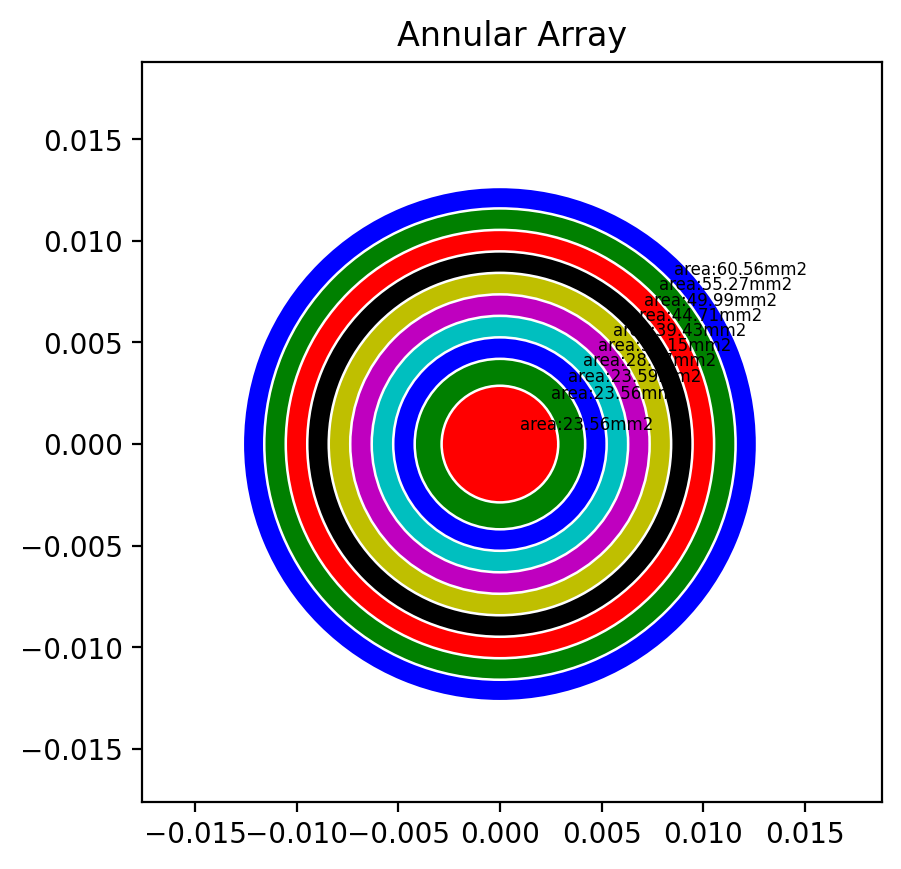

S: 2.356194490192345e-05 Impedance: 36.80698951699388j
S: 2.3561944901923436e-05 Impedance: 41.10523592960441j
S: 2.3587636288282987e-05 Impedance: 41.26603399993565j
S: 2.8868693553394117e-05 Impedance: 33.7431909173668j
S: 3.414975081850523e-05 Impedance: 28.537716708349272j
S: 3.943080808361634e-05 Impedance: 24.7225057868468j
S: 4.471186534872745e-05 Impedance: 21.80652660210286j
S: 4.999292261383856e-05 Impedance: 19.505523900459693j
S: 5.5273979878949666e-05 Impedance: 17.64358359744856j
S: 6.0555037144060816e-05 Impedance: 16.10602317679429j


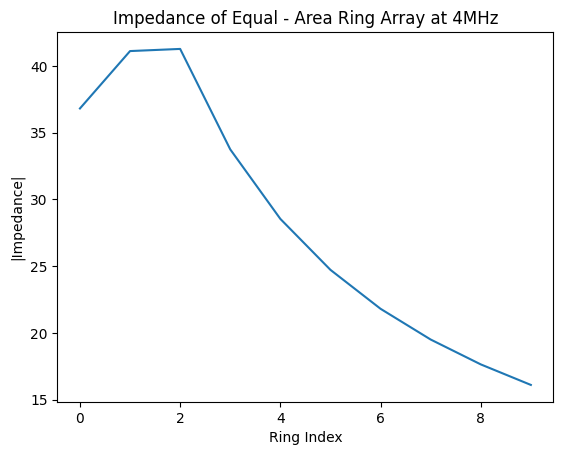

In [114]:
from mpl_toolkits.mplot3d import Axes3D

F = 20e-3
NFmax = 20e-3
R_max = 13.05e-3
m = 10
n = 0.7
delta_d = n * lambda_

# PZT - 3型陶瓷参数
h15 = -2.6 * 10 ** 9  # 压电应力常数
beta11s = 1.23 * 10 ** (-9)  # 恒应变下的介电隔离率
rho = 7500  # 材料密度
C55D = 2.94 * 10 ** 10  # 恒电位下的弹性刚度常数

# 计算剪切波传播速度
Ct = (C55D / rho) ** 0.5
# 根据经验公式或相关理论，假设厚度与波长相关，这里简单假设厚度为1/4波长（实际需根据具体理论模型调整）
l = lambda_ / 4  # 根据频率调整厚度

# 计算剪切波波数
kt = w / Ct

# 定义计算tau的函数
def calculate_tau(a1, a2):
    return (9 * (a1 + a2) ** 2 * (a1 ** 2 + a2 ** 2)) / (8 * (a1 ** 2 + a1 * a2 + a2 ** 2) ** 2)


# 定义计算k15t的函数
def calculate_k15t(tau):
    return h15 / np.sqrt(beta11s * C55D * tau)

# 定义计算阻抗的函数
def calculate_impedance(k15t, kt, l, omega, C0):
    return 1 / (1j * omega * C0) * (1 - (k15t ** 2) * (np.tan(kt * l / 2) / (kt * l / 2)))

impedance = np.zeros(m, dtype=complex)
a1_list = np.zeros(m)
a2_list = np.zeros(m)

# 调用函数计算圆环内外径
a1_list, a2_list = calculate_annular_radii(R_max, m, n, NFmax)
# 调用函数绘制圆环阵列
plot_annular_array(a1_list, a2_list, R_max, colors)
# 计算每个圆环的阻抗
for i in range(m):
    # 计算每个圆环的面积作为振动横截面积S
    S = np.pi * (a2_list[i] ** 2 - a1_list[i] ** 2)
    # 根据公式计算C0
    C0 = S / (beta11s * l)
    tau = calculate_tau(a2_list[i], a1_list[i])
    k15t = calculate_k15t(tau)
    impedance[i] = calculate_impedance(k15t, kt, l, w, C0)
    print("S:", S, "Impedance:", impedance[i])
    
# 绘制圆环序号与阻抗模值的关系图
plt.plot(np.arange(0, m), np.abs(impedance))
plt.xlabel('Ring Index')
plt.ylabel('|Impedance|')
plt.title('Impedance of Equal - Area Ring Array at 4MHz')
plt.show()